In [2]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Spotify Api Credentials 

In [3]:
# Declare the credentials
client_id = '2a7adde1b07a4bf9a5fd750d6ff6f28d'
client_secret = '74a5c5859a0548ccae791419cc29c8fa'
redirect_uri='http://localhost:7777/callback'
username = 'ethan.falcao'
#"383yg3vhnzhume0s2ug7p5y26' is Nur's account 


In [4]:
# Authorization flow
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

## Import data

In [5]:
#13k top spotify songs 
df=pd.read_csv('data/df.csv', sep=",")
#users favorite tracks based on time 
df_fav=pd.read_csv('data/df_fav.csv', sep=",")

## Data Cleaning

In [6]:
df.shape

(12476, 19)

In [7]:
df.columns

Index(['track_id', 'Song', 'Artists', 'Album', 'length', 'time_signature',
       'danceability', 'acousticness', 'energy', 'tempo', 'instrumentalness',
       'loudness', 'liveness', 'key', 'valence', 'speechiness', 'mode',
       'Popularity', 'favorite'],
      dtype='object')

In [8]:
# Create new column with minutes listened to
df['minutes'] = df['length'] / 60000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12476 entries, 0 to 12475
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          12476 non-null  object 
 1   Song              12476 non-null  object 
 2   Artists           12476 non-null  object 
 3   Album             12476 non-null  object 
 4   length            12476 non-null  int64  
 5   time_signature    12476 non-null  int64  
 6   danceability      12476 non-null  float64
 7   acousticness      12476 non-null  float64
 8   energy            12476 non-null  float64
 9   tempo             12476 non-null  float64
 10  instrumentalness  12476 non-null  float64
 11  loudness          12476 non-null  float64
 12  liveness          12476 non-null  float64
 13  key               12476 non-null  float64
 14  valence           12476 non-null  float64
 15  speechiness       12476 non-null  float64
 16  mode              12476 non-null  int64 

In [10]:
df.isnull().sum()

track_id            0
Song                0
Artists             0
Album               0
length              0
time_signature      0
danceability        0
acousticness        0
energy              0
tempo               0
instrumentalness    0
loudness            0
liveness            0
key                 0
valence             0
speechiness         0
mode                0
Popularity          0
favorite            0
minutes             0
dtype: int64

In [11]:
df.head(1)

track_id    Song         Artists   Album  length  \
0  3rUGC1vUpkDG9CZFHMur1t  greedy  ['Tate McRae']  greedy  131872   

   time_signature  danceability  acousticness  energy    tempo  \
0               1          0.75         0.256   0.733  111.018   

   instrumentalness  loudness  liveness  key  valence  speechiness  mode  \
0               0.0     -3.18     0.114  6.0    0.844       0.0319     0   

   Popularity  favorite   minutes  
0        98.0         0  2.197867

In [12]:
top_albums = df['Album'].value_counts().head(10)
top_albums

Album
Greatest Hits          30
Certified Lover Boy    19
- (Deluxe)             18
Spotify Singles        17
More Than You Know     15
÷ (Deluxe)             14
Justice                12
#PressPlayForPride     12
=                      12
1989                   11
Name: count, dtype: int64

In [13]:
top_artists = df['Artists'].value_counts().head()
top_artists

Artists
['The Beatles']      100
['Ed Sheeran']        70
['John Coltrane']     58
['Nina Simone']       52
['Ramones']           52
Name: count, dtype: int64

In [14]:
# Dropping columns that could lead to data leakage
df_num= df.drop(columns=['track_id','Song', 'Album', 'Artists','favorite'])

In [15]:
df_cat = df[['track_id', 'Song', 'Album', 'Artists']]

In [16]:
df['Artists'].nunique()

8103

In [17]:
df_num.describe()

length  time_signature  danceability  acousticness        energy  \
count  1.247600e+04    12476.000000  12476.000000  12476.000000  12476.000000   
mean   2.389266e+05        3.899487      0.551771      0.317325      0.592457   
std    1.267425e+05        0.440619      0.189021      0.362403      0.284793   
min    9.750000e+03        0.000000      0.000000      0.000001      0.000568   
25%    1.773818e+05        4.000000      0.427000      0.016075      0.412000   
50%    2.120865e+05        4.000000      0.569000      0.128000      0.656000   
75%    2.594198e+05        4.000000      0.691000      0.611000      0.829000   
max    4.170227e+06        5.000000      0.978000      0.996000      0.999000   

              tempo  instrumentalness      loudness      liveness  \
count  12476.000000      12476.000000  12476.000000  12476.000000   
mean     120.136017          0.182072     -9.645638      0.183381   
std       29.070033          0.323811      6.968844      0.148875   
min        0.000000          0.000000    -44.150000      0.012000   
25%       98.018750          0.000000    -10.998250      0.094200   
50%      122.002000          0.000300     -7.211500      0.122000   
75%      137.959000          0.177000     -5.191750      0.225000   
max      219.446000          0.986000      1.177000      0.985000   

                key       valence   speechiness          mode    Popularity  \
count  12476.000000  12476.000000  12476.000000  12476.000000  12476.000000   
mean       5.301379      0.436285      0.080486      0.637785     50.770199   
std        3.551790      0.258946      0.088480      0.480660     19.415045   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.217000      0.036800      0.000000     39.000000   
50%        5.000000      0.419000      0.047300      1.000000     52.000000   
75%        8.000000      0.635000      0.078700      1.000000     65.000000   
max       11.000000      0.994000      0.960000      1.000000    100.000000   

            minutes  
count  12476.000000  
mean       3.982109  
std        2.112374  
min        0.162500  
25%        2.956363  
50%        3.534775  
75%        4.323663  
max       69.503783

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12476 entries, 0 to 12475
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          12476 non-null  object 
 1   Song              12476 non-null  object 
 2   Artists           12476 non-null  object 
 3   Album             12476 non-null  object 
 4   length            12476 non-null  int64  
 5   time_signature    12476 non-null  int64  
 6   danceability      12476 non-null  float64
 7   acousticness      12476 non-null  float64
 8   energy            12476 non-null  float64
 9   tempo             12476 non-null  float64
 10  instrumentalness  12476 non-null  float64
 11  loudness          12476 non-null  float64
 12  liveness          12476 non-null  float64
 13  key               12476 non-null  float64
 14  valence           12476 non-null  float64
 15  speechiness       12476 non-null  float64
 16  mode              12476 non-null  int64 

Categorical Values

In [19]:
# Count unique values 
print("Unique Track IDs:", df['track_id'].nunique())
print("Unique Songs:",  df['Song'].nunique())
print("Unique Artists:", df['Artists'].nunique())
print("Unique Albums:", df['Album'].nunique())

Unique Track IDs: 12476
Unique Songs: 11743
Unique Artists: 8103
Unique Albums: 9726


In [20]:
category_proportions = df_cat['Song'].value_counts(normalize=True)
category_proportions

Song
Forever                                  0.000641
Boyfriend                                0.000481
Hello                                    0.000401
Save Me                                  0.000401
On & On                                  0.000401
                                           ...   
Heels Over Head                          0.000080
Hey Driver (feat. The War and Treaty)    0.000080
Rich Men North of Richmond               0.000080
Mean Old Sun                             0.000080
Albatross - 2018 Remaster                0.000080
Name: proportion, Length: 11743, dtype: float64

# EDA


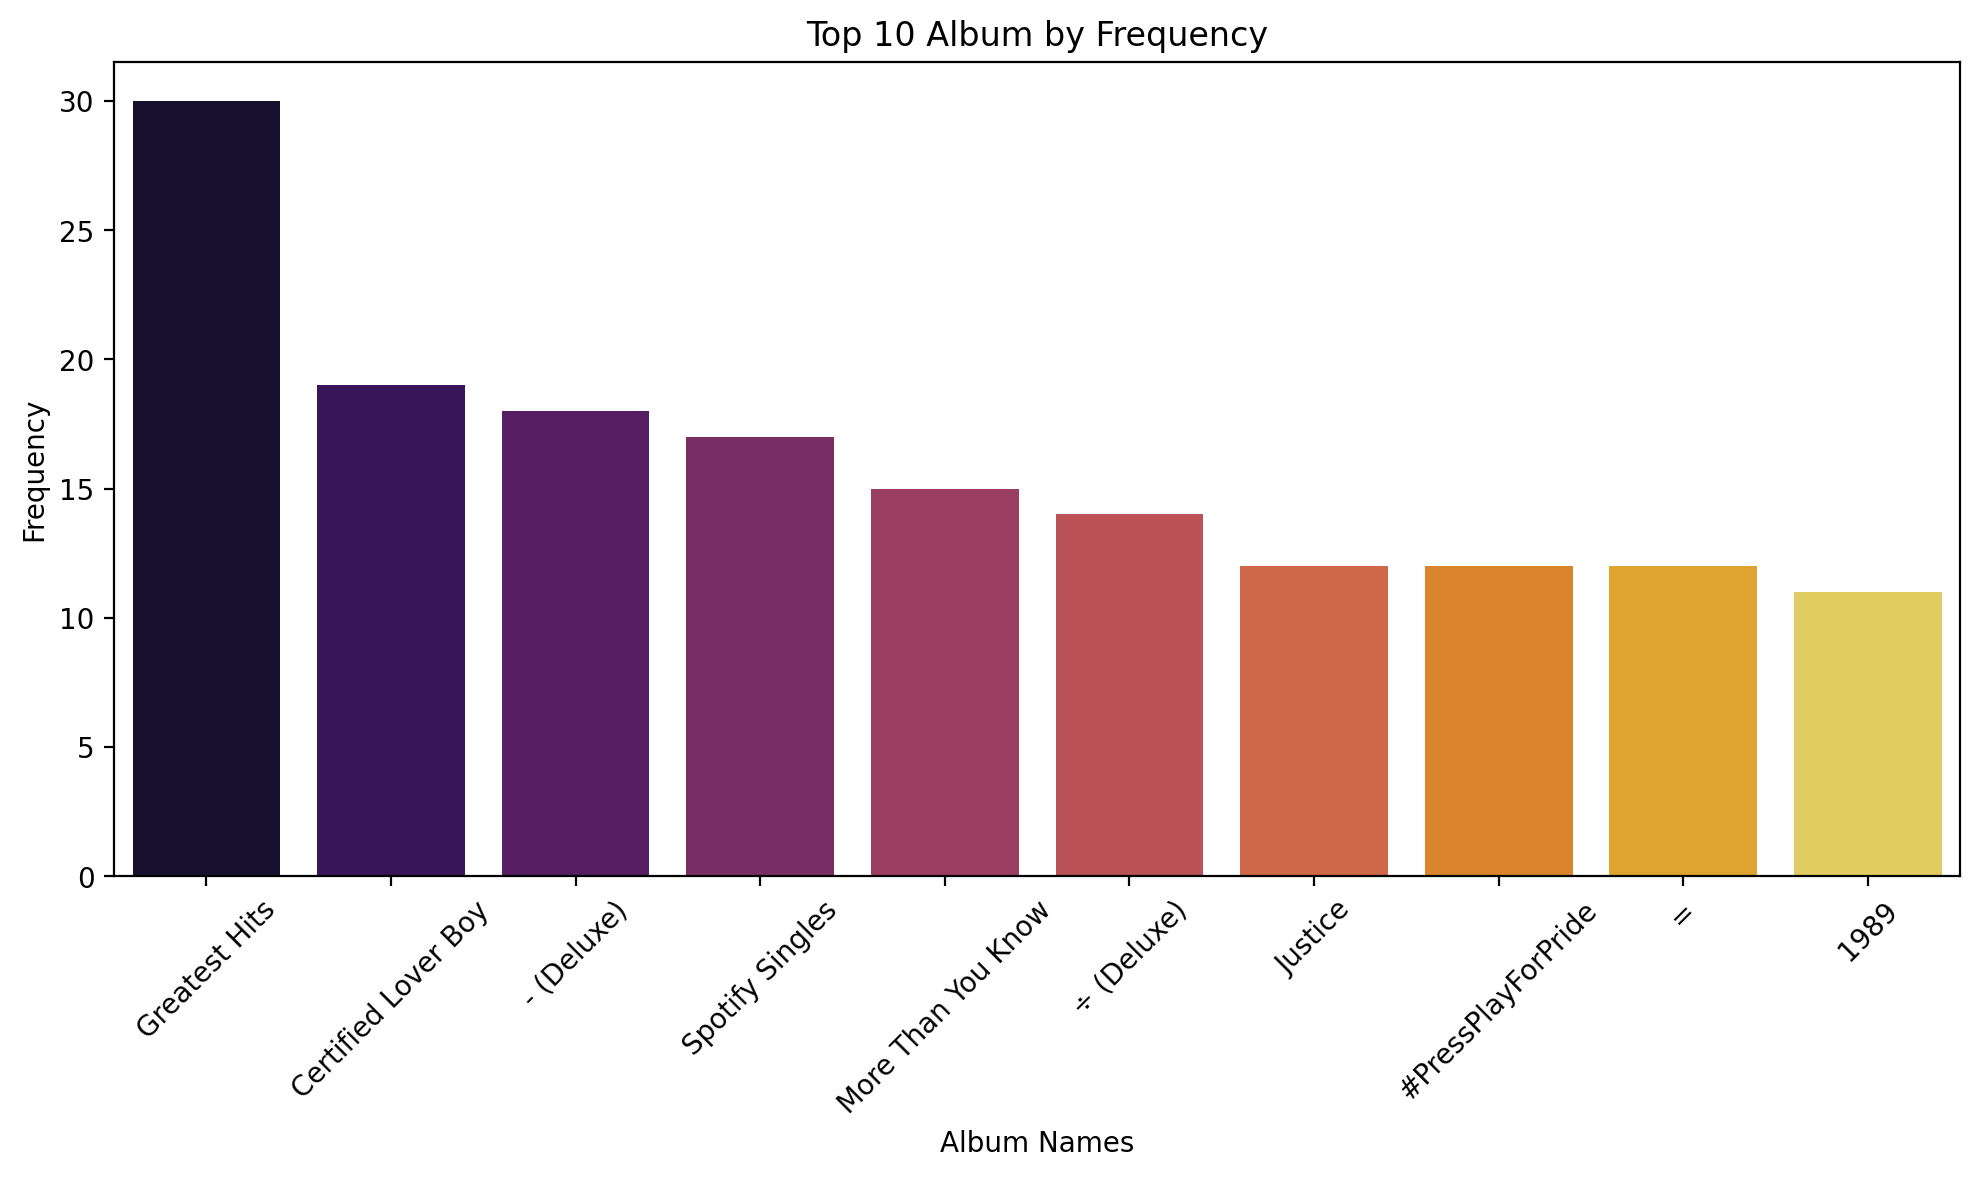

In [21]:
# Get the top 10 artists based on their frequency
top_10_artists = df['Album'].value_counts().head(10).reset_index()
top_10_artists.columns = ['Album Names', 'Frequency']


# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Album Names', y='Frequency', data=top_10_artists, palette="inferno")
plt.xticks(rotation=45)  
plt.xlabel('Album Names')
plt.ylabel('Frequency')
plt.title('Top 10 Album by Frequency')
plt.tight_layout()
plt.show()


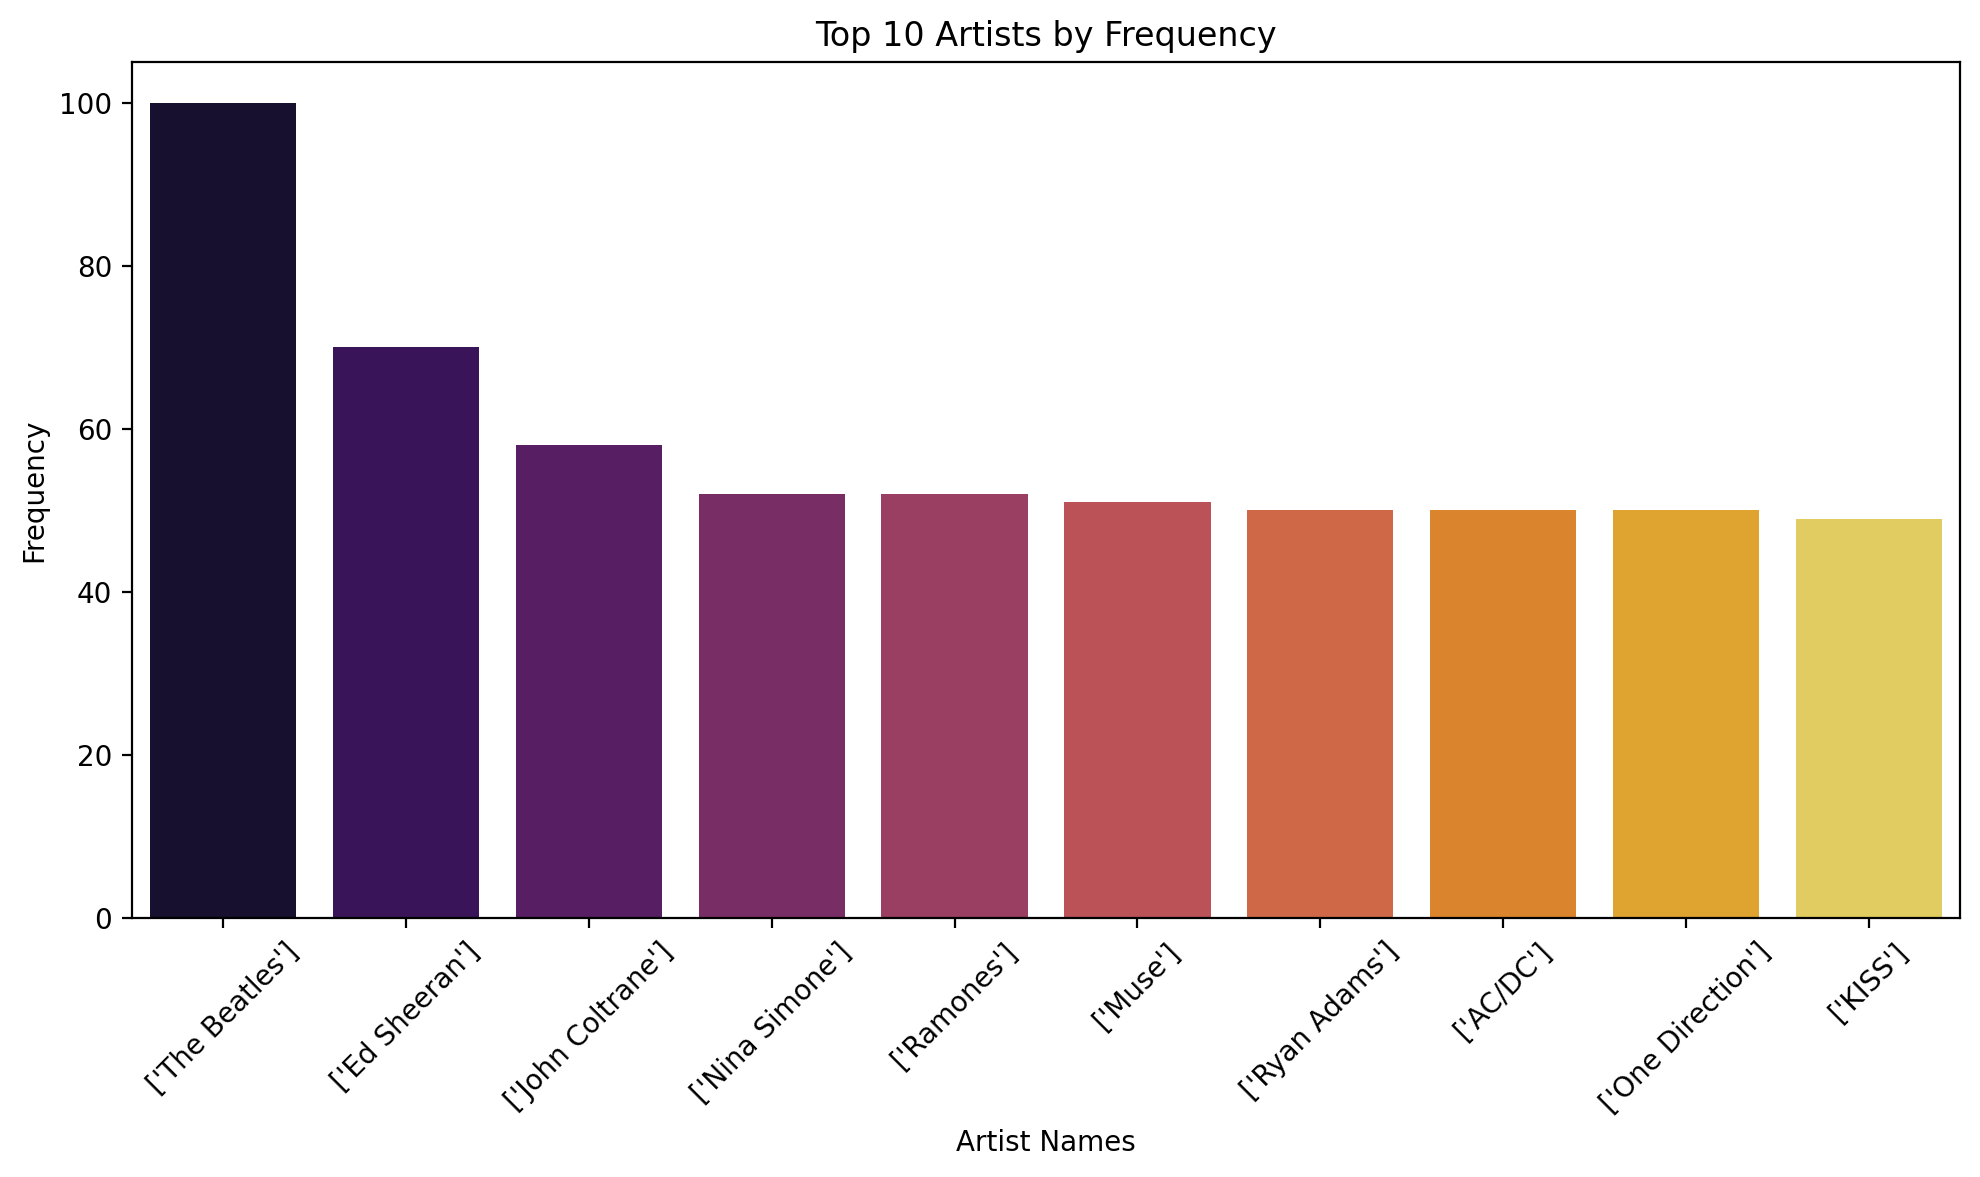

In [22]:
# Get the top 10 artists based on their frequency
top_10_artists = df['Artists'].value_counts().head(10).reset_index()
top_10_artists.columns = ['Artist Names', 'Frequency']


# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Artist Names', y='Frequency', data=top_10_artists, palette="inferno")
plt.xticks(rotation=45)  
plt.xlabel('Artist Names')
plt.ylabel('Frequency')
plt.title('Top 10 Artists by Frequency')
plt.tight_layout()
plt.show()


In [23]:

import pandas as pd
import numpy as np

corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

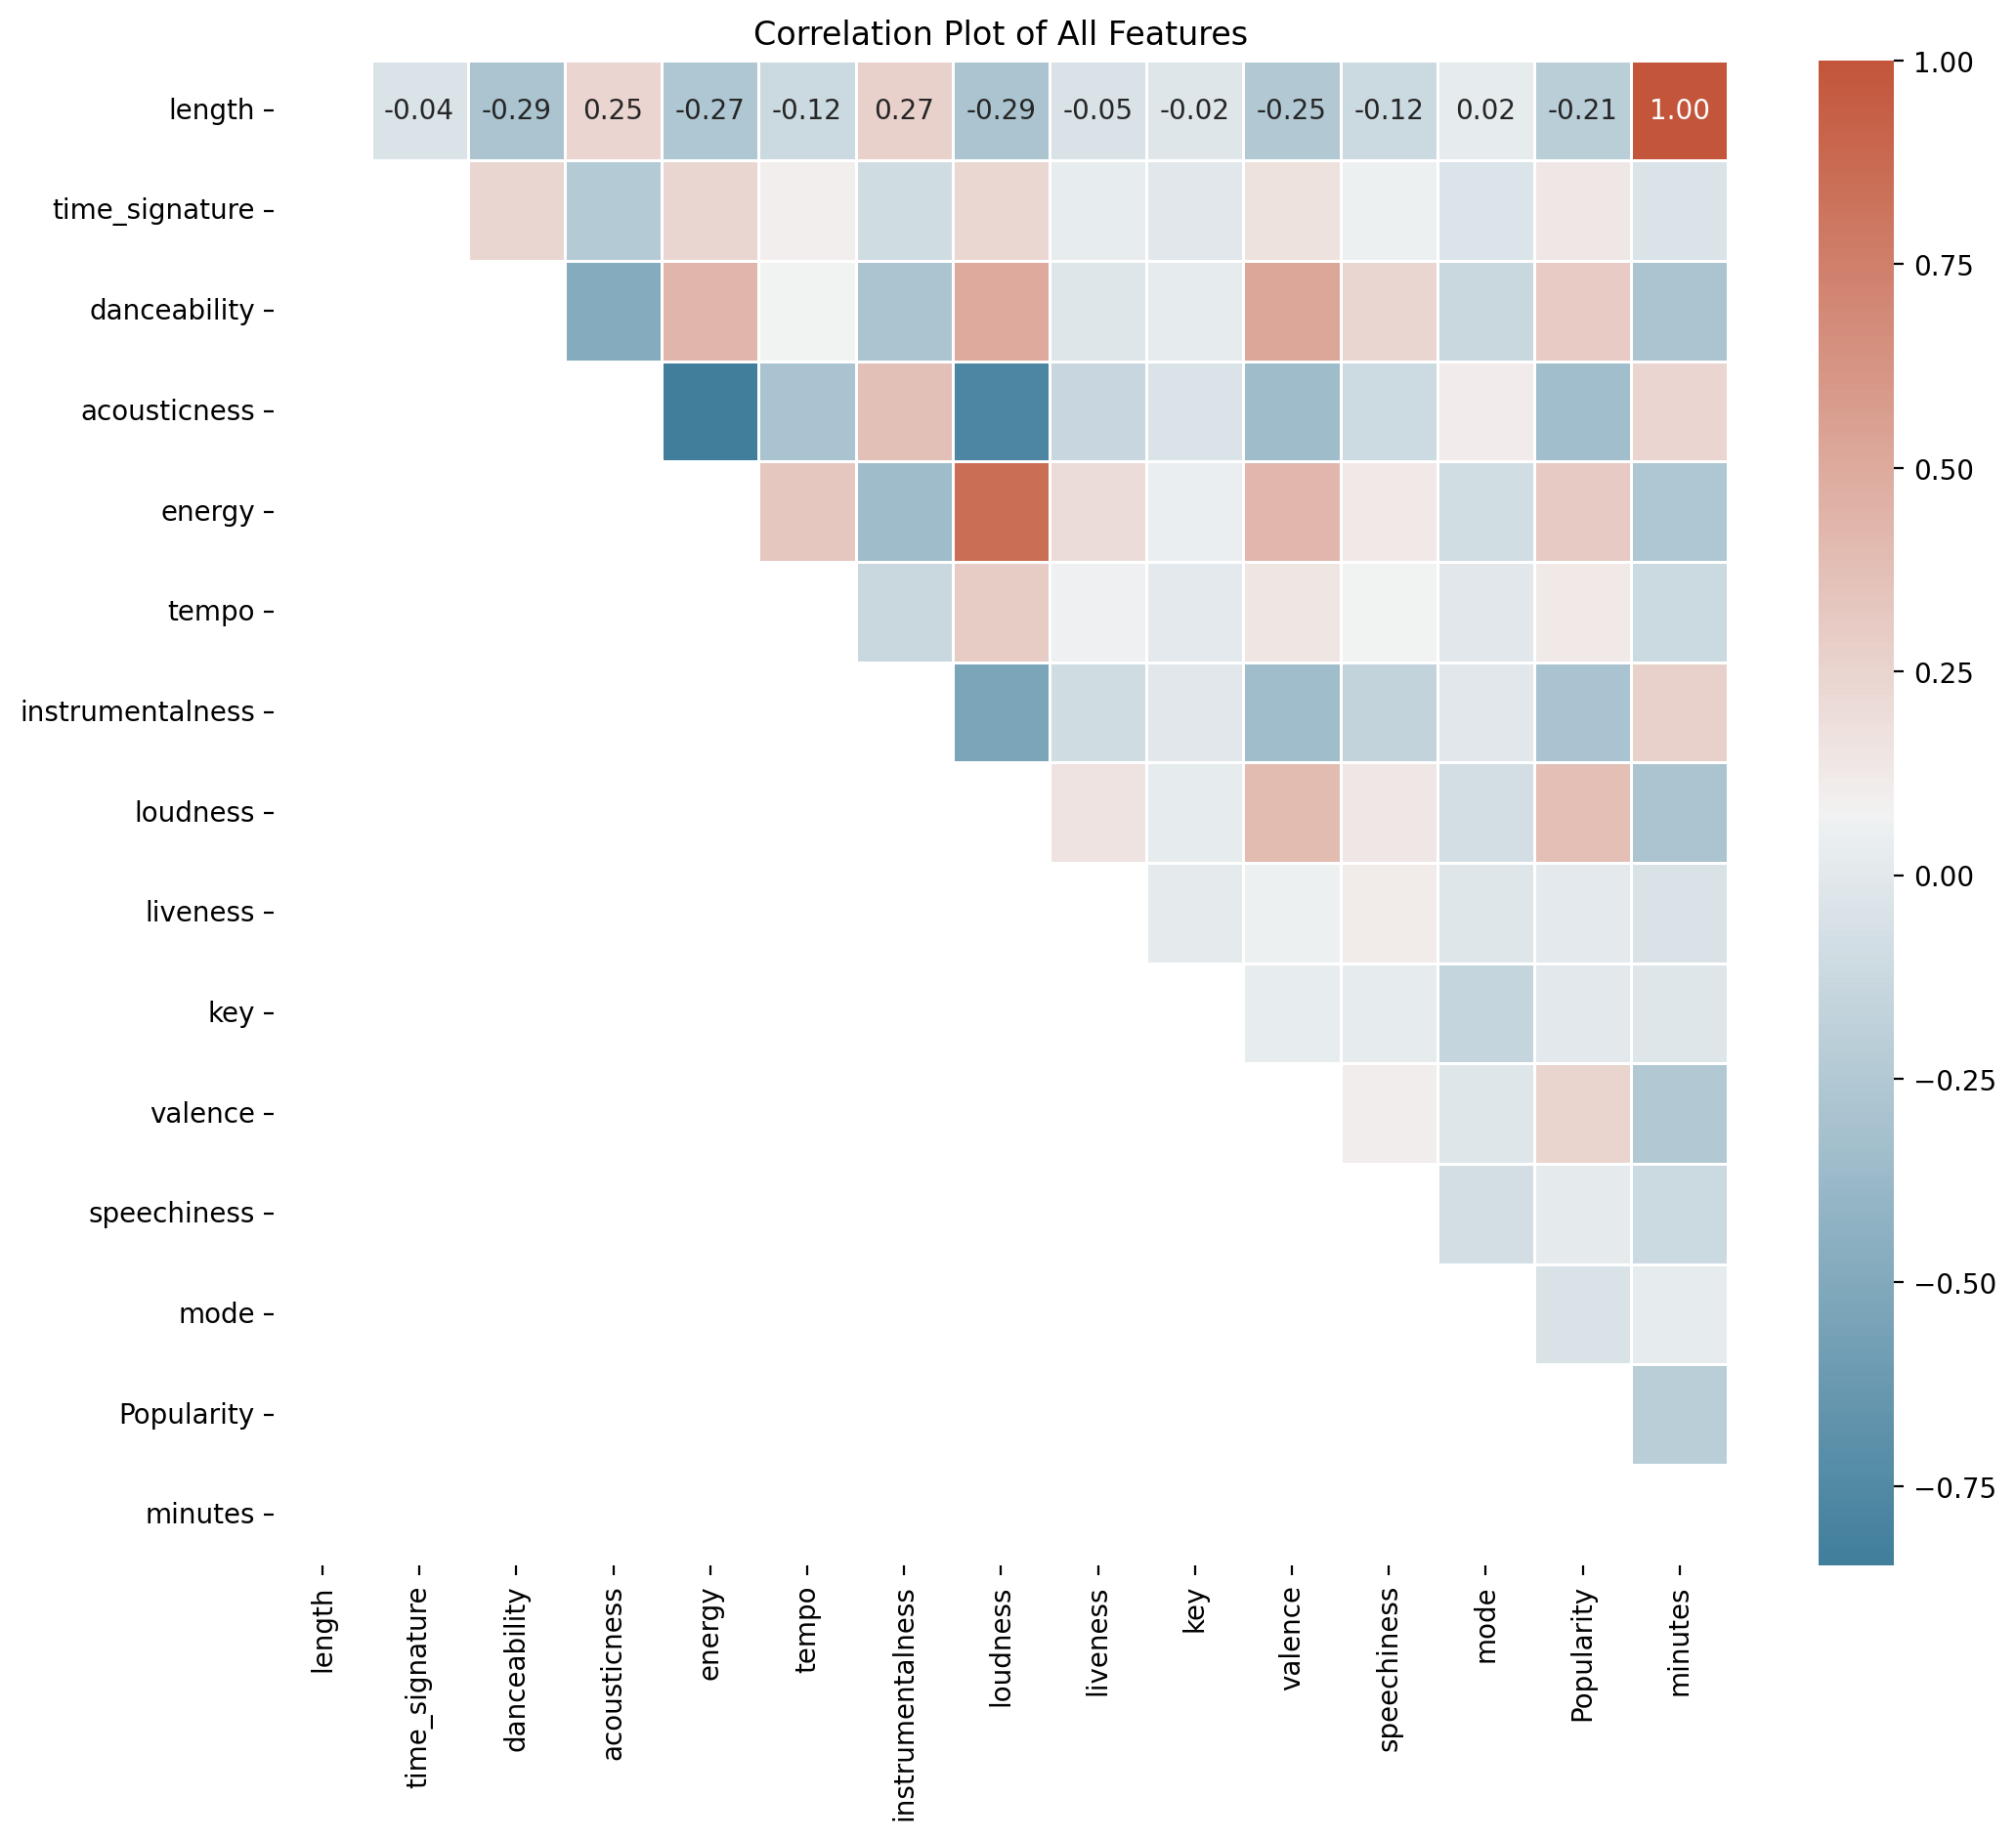

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for all numerical features in your DataFrame
corr = df_num.corr()

# Set up the matplotlib figure and adjust its size
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.tril(np.ones_like(corr, dtype=bool))

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Plot of All Features')
plt.show()



### Distribution

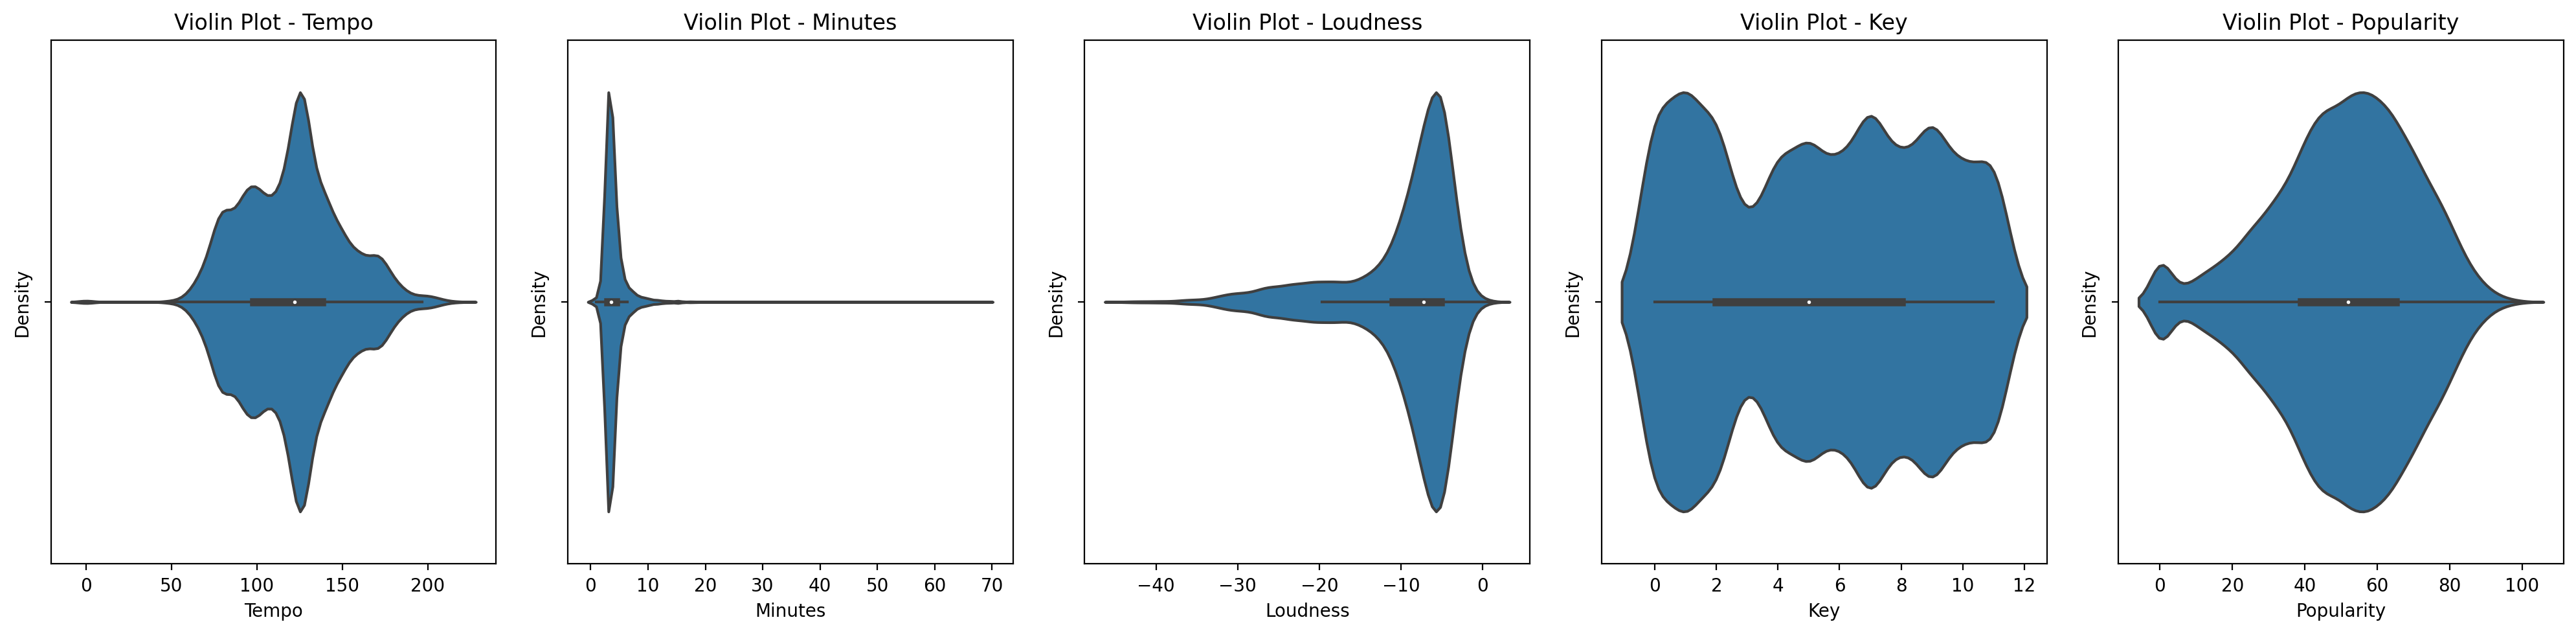

In [104]:
# Create a figure and multiple subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # Five subplots for five violin plots

# Plot multiple violin plots
sns.violinplot(x=df["tempo"], ax=axes[0])
axes[0].set_title('Violin Plot - Tempo')
axes[0].set_xlabel('Tempo')
axes[0].set_ylabel('Density')

sns.violinplot(x=df["minutes"], ax=axes[1])
axes[1].set_title('Violin Plot - Minutes')
axes[1].set_xlabel('Minutes')
axes[1].set_ylabel('Density')

sns.violinplot(x=df["loudness"], ax=axes[2])
axes[2].set_title('Violin Plot - Loudness')
axes[2].set_xlabel('Loudness')
axes[2].set_ylabel('Density')

sns.violinplot(x=df["key"], ax=axes[3])
axes[3].set_title('Violin Plot - Key')
axes[3].set_xlabel('Key')
axes[3].set_ylabel('Density')

sns.violinplot(x=df["Popularity"], ax=axes[4])
axes[4].set_title('Violin Plot - Popularity')
axes[4].set_xlabel('Popularity')
axes[4].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [95]:
df.describe()

length  time_signature  danceability  acousticness        energy  \
count  1.247600e+04    12476.000000  12476.000000  12476.000000  12476.000000   
mean   2.389266e+05        3.899487      0.551771      0.317325      0.592457   
std    1.267425e+05        0.440619      0.189021      0.362403      0.284793   
min    9.750000e+03        0.000000      0.000000      0.000001      0.000568   
25%    1.773818e+05        4.000000      0.427000      0.016075      0.412000   
50%    2.120865e+05        4.000000      0.569000      0.128000      0.656000   
75%    2.594198e+05        4.000000      0.691000      0.611000      0.829000   
max    4.170227e+06        5.000000      0.978000      0.996000      0.999000   

              tempo  instrumentalness      loudness      liveness  \
count  12476.000000      12476.000000  12476.000000  12476.000000   
mean     120.136017          0.182072     -9.645638      0.183381   
std       29.070033          0.323811      6.968844      0.148875   
min        0.000000          0.000000    -44.150000      0.012000   
25%       98.018750          0.000000    -10.998250      0.094200   
50%      122.002000          0.000300     -7.211500      0.122000   
75%      137.959000          0.177000     -5.191750      0.225000   
max      219.446000          0.986000      1.177000      0.985000   

                key       valence   speechiness          mode    Popularity  \
count  12476.000000  12476.000000  12476.000000  12476.000000  12476.000000   
mean       5.301379      0.436285      0.080486      0.637785     50.770199   
std        3.551790      0.258946      0.088480      0.480660     19.415045   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.217000      0.036800      0.000000     39.000000   
50%        5.000000      0.419000      0.047300      1.000000     52.000000   
75%        8.000000      0.635000      0.078700      1.000000     65.000000   
max       11.000000      0.994000      0.960000      1.000000    100.000000   

       favorite       minutes  
count   12476.0  12476.000000  
mean        0.0      3.982109  
std         0.0      2.112374  
min         0.0      0.162500  
25%         0.0      2.956363  
50%         0.0      3.534775  
75%         0.0      4.323663  
max         0.0     69.503783

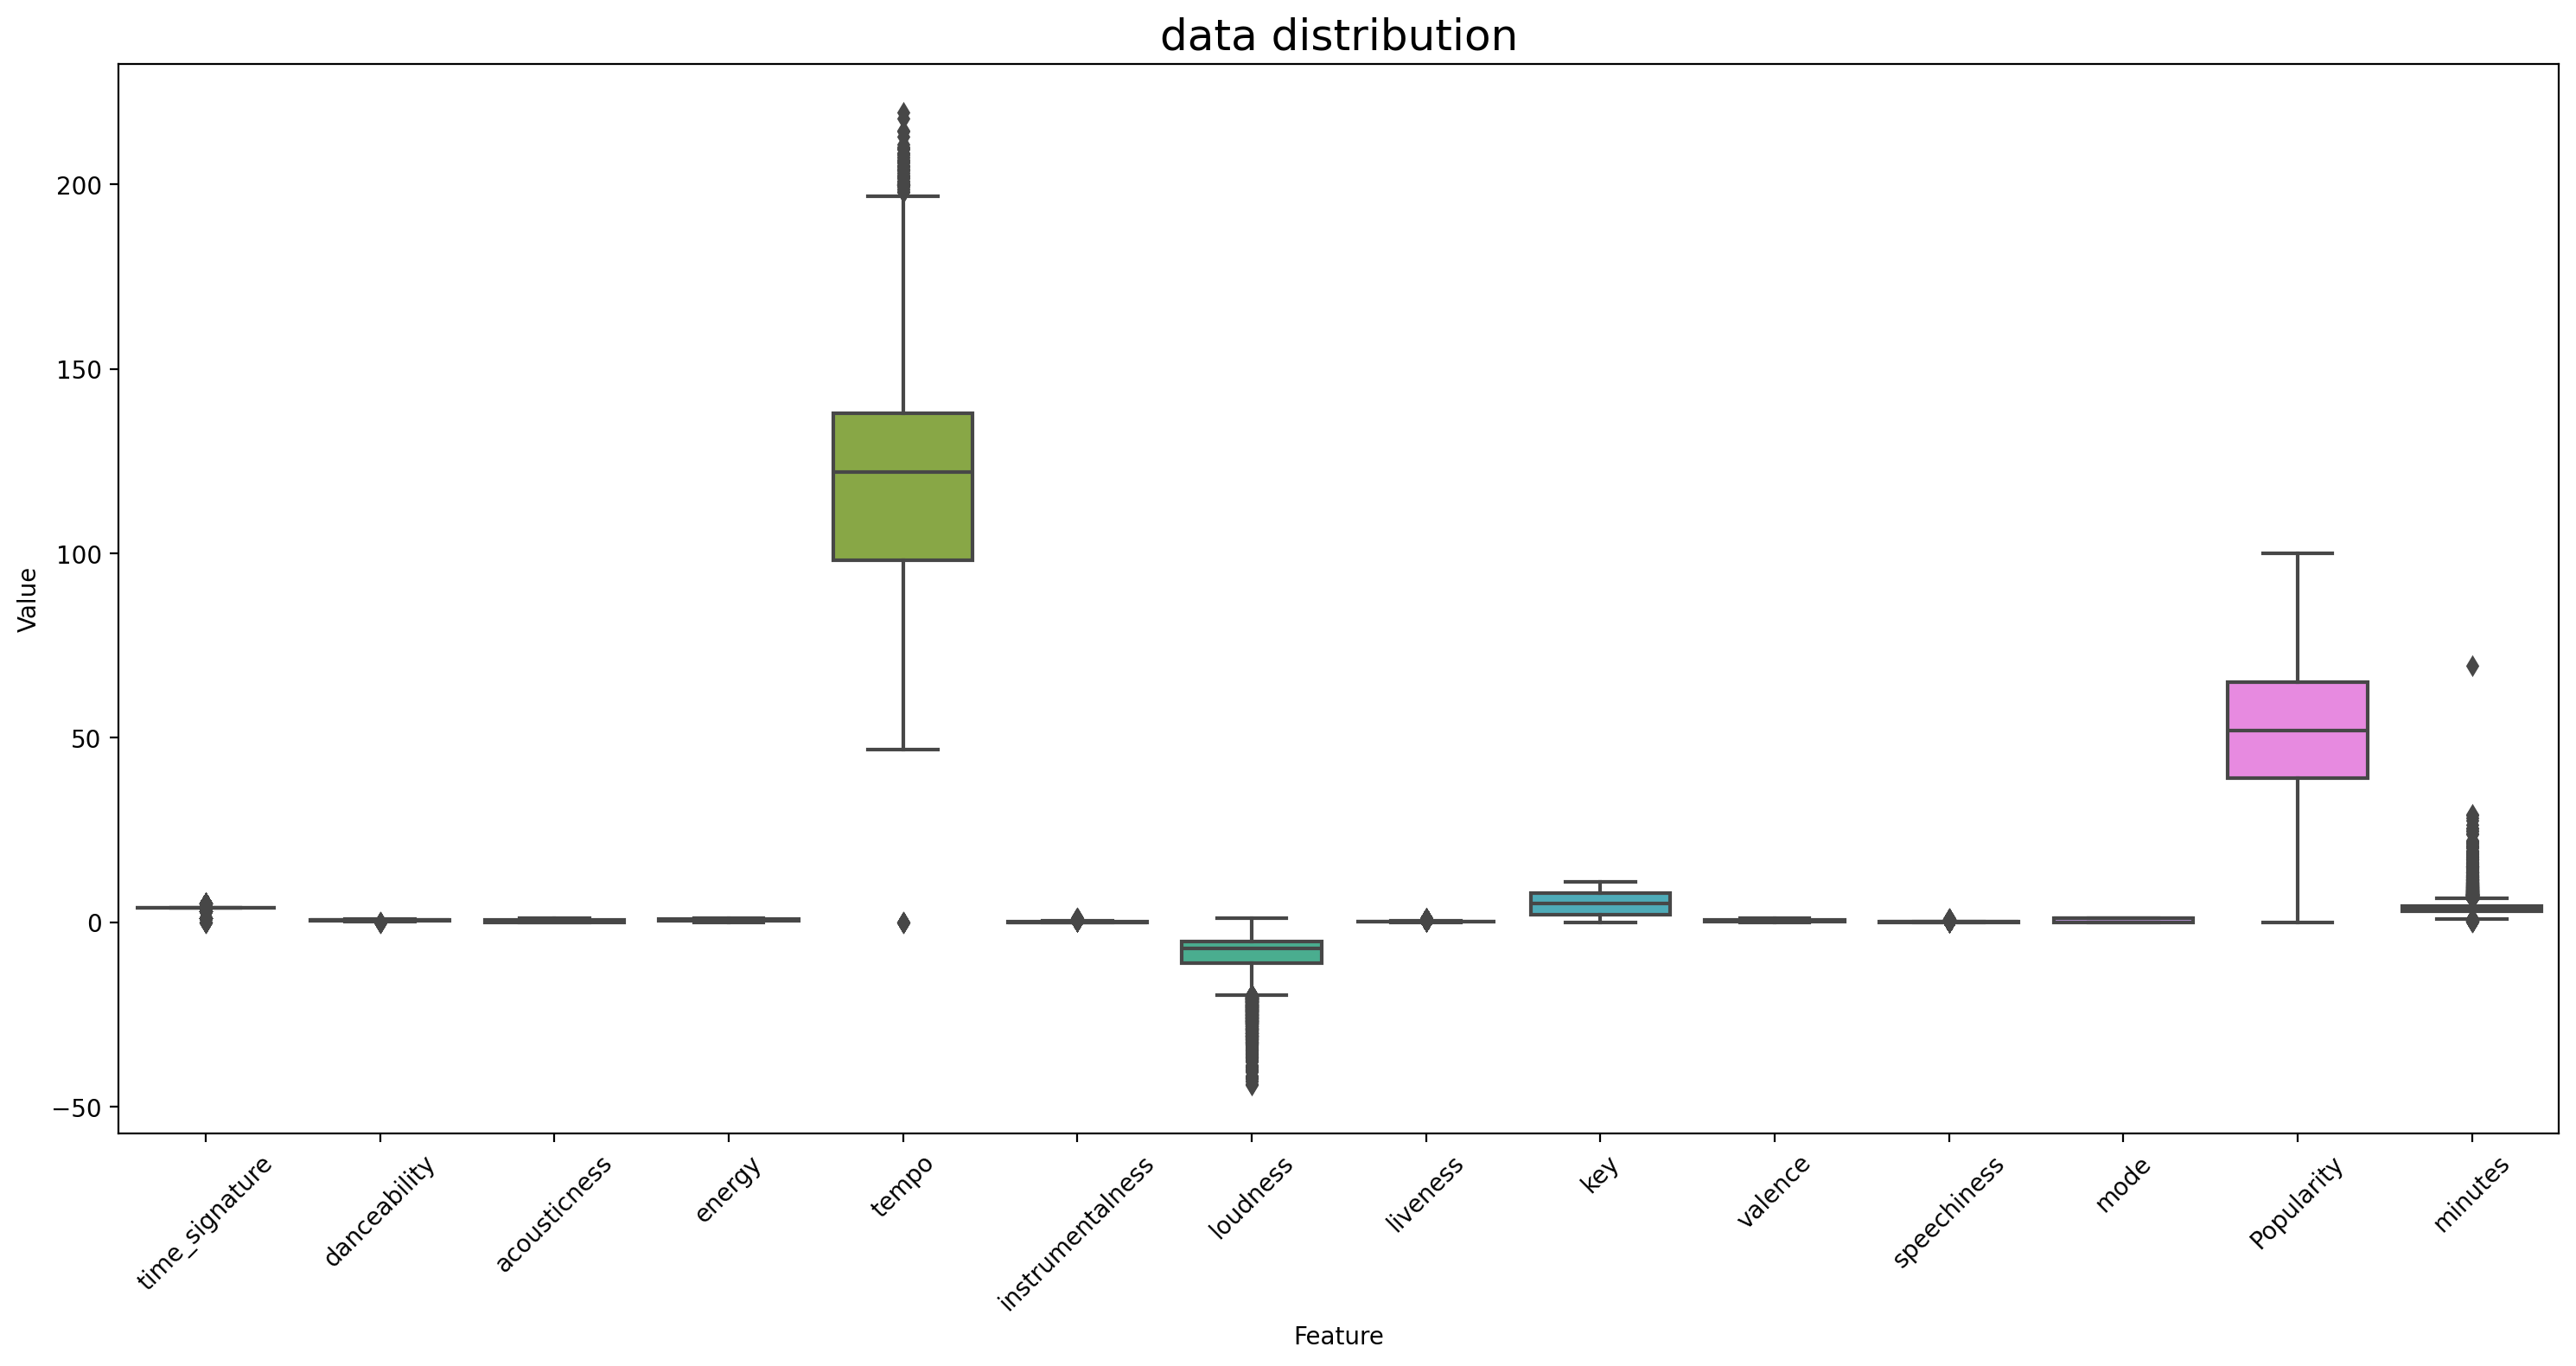

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_num_dis= df_num.drop(columns=['length'])


# Stacking the data for a single box plot
stacked_data = df_num_dis.melt(var_name='Feature', value_name='Value')

# Create a single box plot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
sns.boxplot(data=stacked_data, x='Feature', y='Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('data distribution',size=18)
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd

# Assuming you have a DataFrame 'df' with the variables you want to compute correlations for
correlation_matrix = df_num.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# To focus on the correlation of a specific variable (e.g., 'loudness') with others:
loudness_correlation = correlation_matrix['loudness']
print("\nCorrelation with 'loudness':")
print(loudness_correlation)


Correlation Matrix:
                    length  time_signature  danceability  acousticness  \
length            1.000000       -0.043056     -0.290358      0.245320   
time_signature   -0.043056        1.000000      0.239619     -0.240032   
danceability     -0.290358        0.239619      1.000000     -0.479386   
acousticness      0.245320       -0.240032     -0.479386      1.000000   
energy           -0.268111        0.237640      0.424765     -0.846895   
tempo            -0.120469        0.093605      0.075723     -0.293490   
instrumentalness  0.268081       -0.102115     -0.290917      0.368422   
loudness         -0.288439        0.232678      0.497998     -0.778568   
liveness         -0.047070        0.032933     -0.021101     -0.138348   
key              -0.016142       -0.006048      0.022066     -0.041847   
valence          -0.249922        0.170144      0.519245     -0.353363   
speechiness      -0.120768        0.058781      0.240863     -0.117012   
mode              

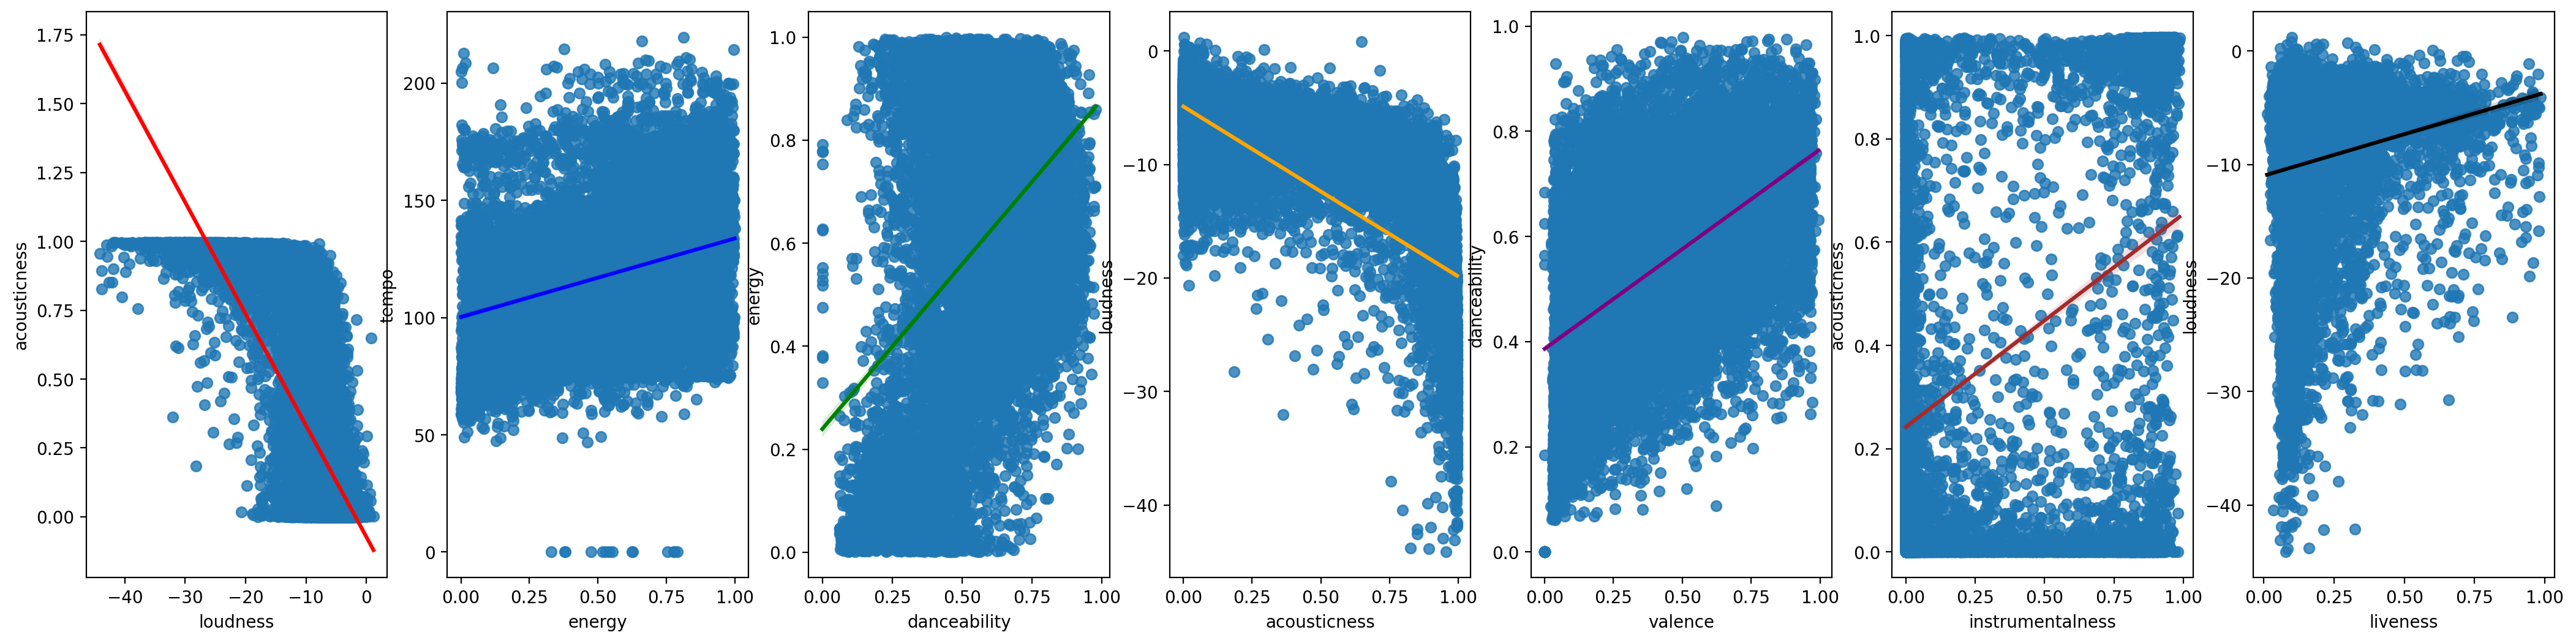

In [113]:
# Create a wider figure with 7 subplots
fig, axs = plt.subplots(ncols=7, figsize=(26, 6))

# Create scatterplots with linear regression lines on the subplots
sns.regplot(x='loudness', y='acousticness', data=df, ax=axs[0], line_kws={"color": "red"})
sns.regplot(x='energy', y='tempo', data=df, ax=axs[1], line_kws={"color": "blue"})
sns.regplot(x='danceability', y='energy', data=df, ax=axs[2], line_kws={"color": "green"})
sns.regplot(x='acousticness', y='loudness', data=df, ax=axs[3], line_kws={"color": "orange"})
sns.regplot(x='valence', y='danceability', data=df, ax=axs[4], line_kws={"color": "purple"})
sns.regplot(x='instrumentalness', y='acousticness', data=df, ax=axs[5], line_kws={"color": "brown"})
sns.regplot(x='liveness', y='loudness', data=df, ax=axs[6], line_kws={"color": "black"})

plt.show()


In [29]:
import pandas as pd
from scipy.stats import pearsonr


# Select the feature of interest
feature_of_interest = 'energy'

# Calculate correlations
correlations = {}

for column in df_num.columns:
    if column != feature_of_interest:
        corr, _ = pearsonr(df_num[feature_of_interest], df_num[column])
        correlations[column] = corr

# Display the correlations
for feature, correlation in correlations.items():
    print(f'Correlation between {feature_of_interest} and {feature}: {correlation:.2f}')


Correlation between energy and length: -0.27
Correlation between energy and time_signature: 0.24
Correlation between energy and danceability: 0.42
Correlation between energy and acousticness: -0.85
Correlation between energy and tempo: 0.33
Correlation between energy and instrumentalness: -0.35
Correlation between energy and loudness: 0.85
Correlation between energy and liveness: 0.20
Correlation between energy and key: 0.04
Correlation between energy and valence: 0.42
Correlation between energy and speechiness: 0.13
Correlation between energy and mode: -0.09
Correlation between energy and Popularity: 0.31
Correlation between energy and minutes: -0.27


In [30]:
import pandas as pd
from scipy.stats import pearsonr


# Select the feature of interest
feature_of_interest = 'Popularity'

# Calculate correlations
correlations = {}

for column in df_num.columns:
    if column != feature_of_interest:
        corr, _ = pearsonr(df_num[feature_of_interest], df_num[column])
        correlations[column] = corr

# Display the correlations
for feature, correlation in correlations.items():
    print(f'Correlation between {feature_of_interest} and {feature}: {correlation:.2f}')


Correlation between Popularity and length: -0.21
Correlation between Popularity and time_signature: 0.14
Correlation between Popularity and danceability: 0.31
Correlation between Popularity and acousticness: -0.34
Correlation between Popularity and energy: 0.31
Correlation between Popularity and tempo: 0.13
Correlation between Popularity and instrumentalness: -0.30
Correlation between Popularity and loudness: 0.37
Correlation between Popularity and liveness: 0.01
Correlation between Popularity and key: 0.00
Correlation between Popularity and valence: 0.25
Correlation between Popularity and speechiness: 0.02
Correlation between Popularity and mode: -0.05
Correlation between Popularity and minutes: -0.21


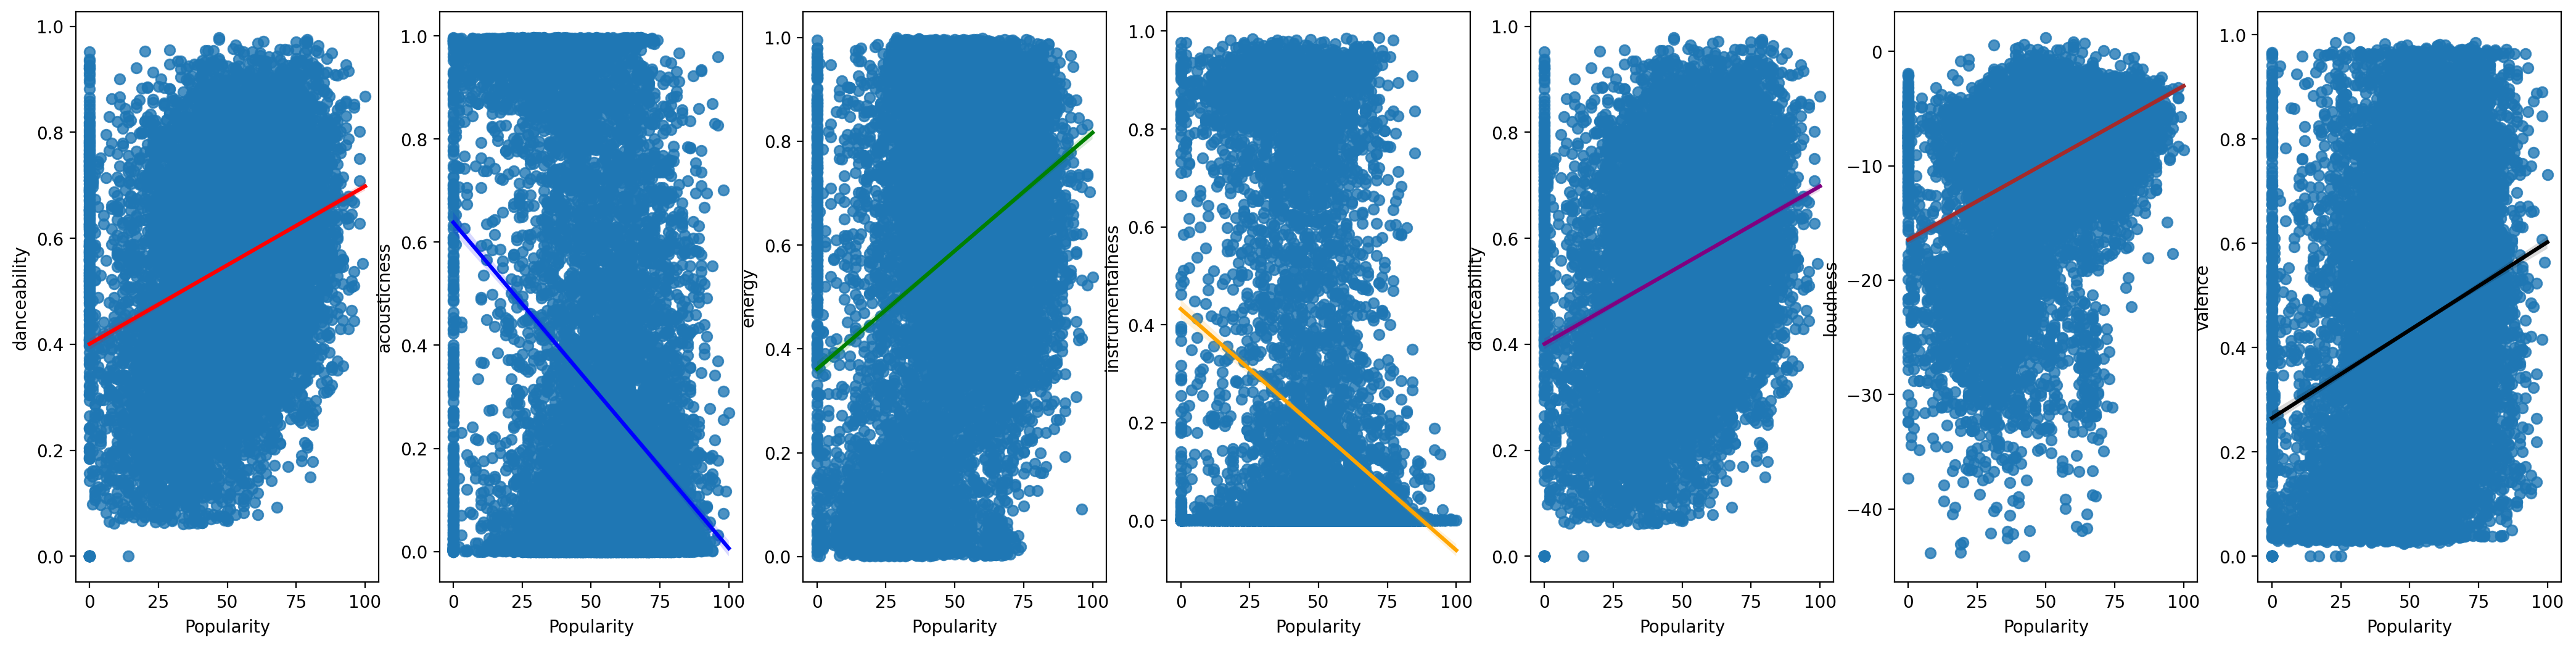

In [114]:
# Create a wider figure with 7 subplots
fig, axs = plt.subplots(ncols=7, figsize=(26, 6))

# Create scatterplots with linear regression lines on the subplots
sns.regplot(x='Popularity', y='danceability', data=df, ax=axs[0], line_kws={"color": "red"})
sns.regplot(x='Popularity', y='acousticness', data=df, ax=axs[1], line_kws={"color": "blue"})
sns.regplot(x='Popularity', y='energy', data=df, ax=axs[2], line_kws={"color": "green"})
sns.regplot(x='Popularity', y='instrumentalness', data=df, ax=axs[3], line_kws={"color": "orange"})
sns.regplot(x='Popularity', y='danceability', data=df, ax=axs[4], line_kws={"color": "purple"})
sns.regplot(x='Popularity', y='loudness', data=df, ax=axs[5], line_kws={"color": "brown"})
sns.regplot(x='Popularity', y='valence', data=df, ax=axs[6], line_kws={"color": "black"})
plt.show()

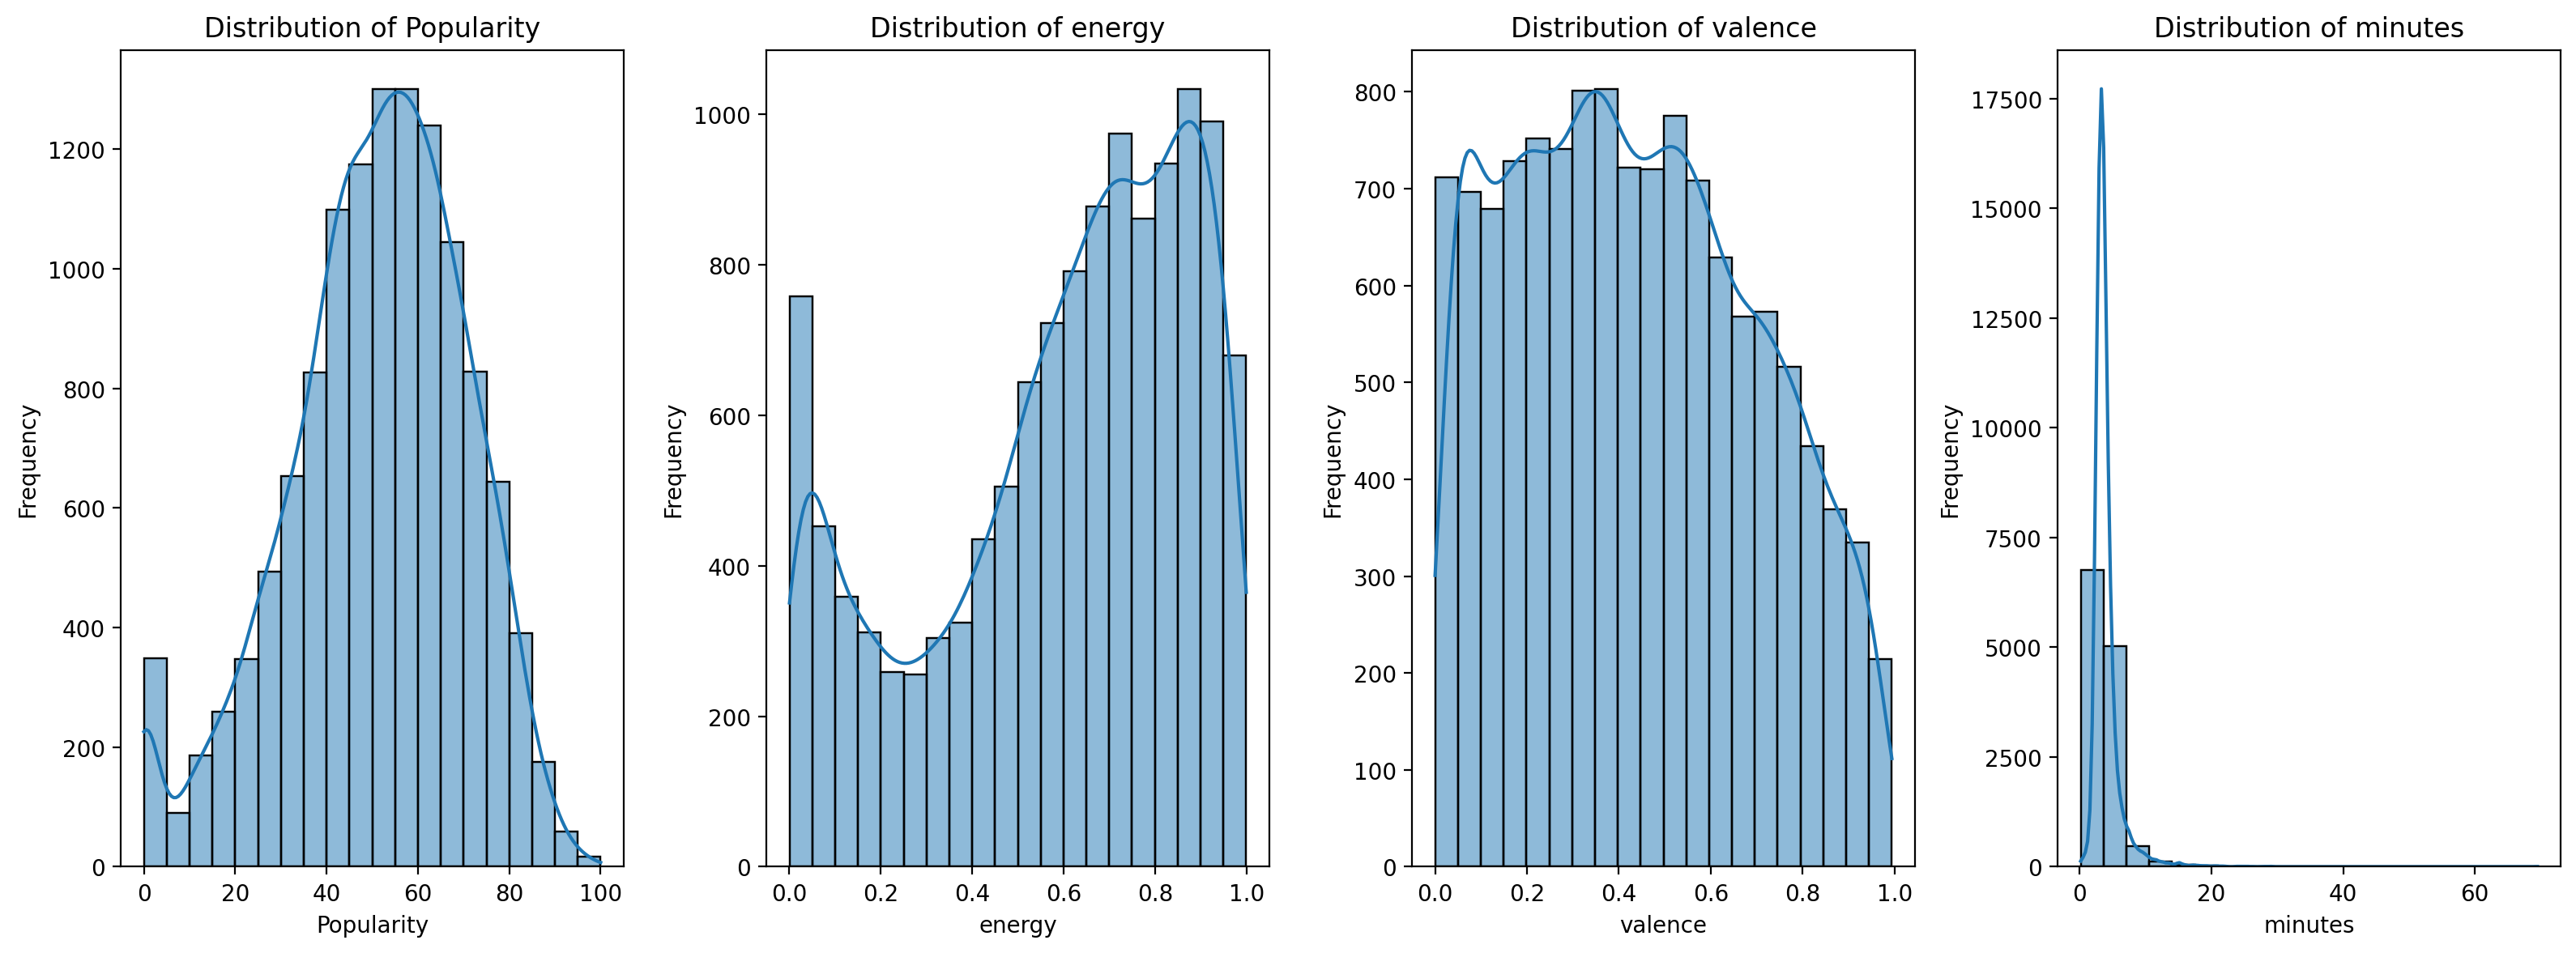

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_num contains multiple columns you want to plot
columns_to_plot = ['Popularity', 'energy', 'valence', 'minutes']  # Replace these with your actual column names

num_columns = len(columns_to_plot)
fig, axes = plt.subplots(1, num_columns, figsize=(16, 6))  # Adjust the figsize as needed

for i, column in enumerate(columns_to_plot):
    sns.histplot(df_num[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()


In [33]:
#pivot table to explore values. A basic pivot table takes the average of these different categories we choose.

pd.pivot_table(df, index = 'Album', values = 'Popularity')

Popularity
Album                                                         
!Volare! The Very Best of the Gipsy Kings            52.000000
"DESTRUCTION FOR DUMMIES", PT. 2 JEAN DAWSON AS...   51.000000
"Filthy"                                             42.000000
"Heroes" (2017 Remaster)                             77.000000
"Homage" - The Age of the Diva                        3.000000
...                                                        ...
÷ (Deluxe)                                           73.571429
הכל או כלום                                          20.000000
คนขี้หวง (About Chu)                                 41.000000
•NOTDEAD!•                                           48.000000
天の川 (River of Heaven)                                38.000000

[9726 rows x 1 columns]

<Axes: xlabel='minutes', ylabel='Popularity'>

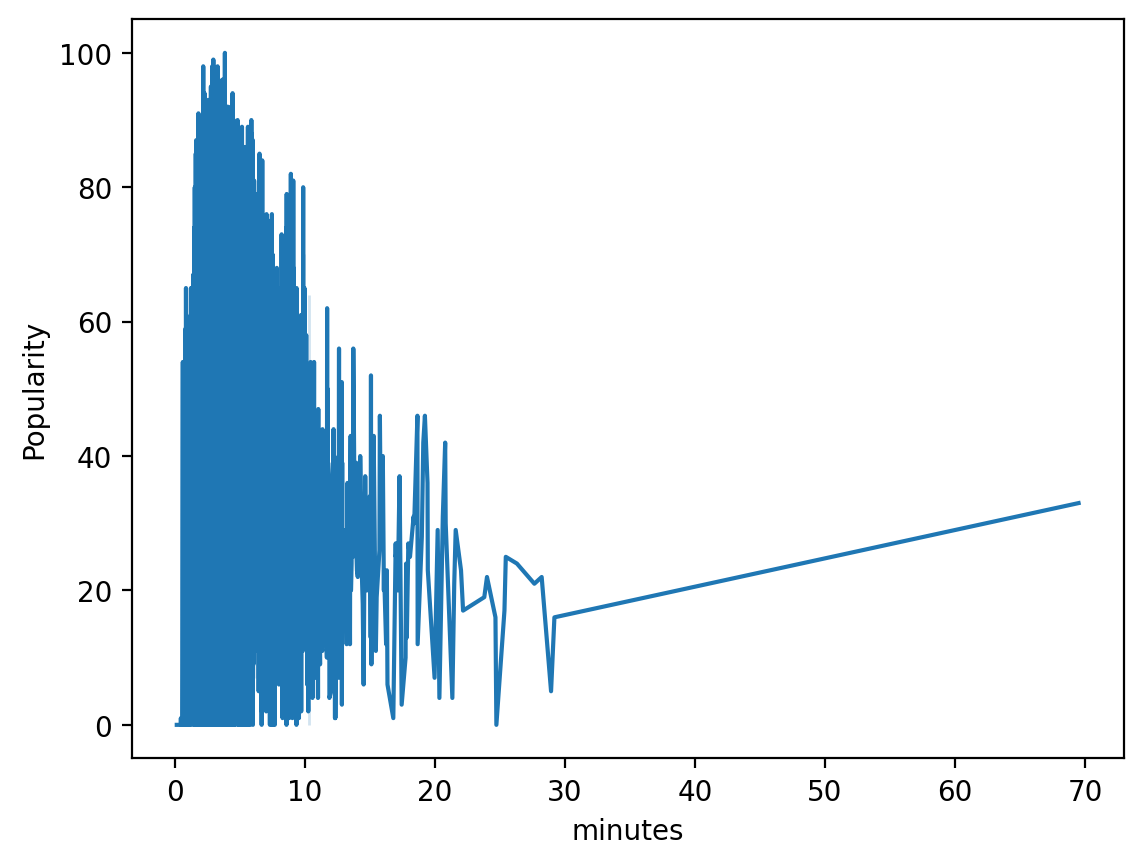

In [34]:
import seaborn as sns
sns.lineplot(df,x='minutes', y='Popularity')

In [91]:
#Drake song's sorted by tempo
drake_songs = df[df['Artists'].apply(lambda x: 'Drake' in x)]
drake_sorted_by_tempo = drake_songs.sort_values('tempo', ascending=False)
drake_sorted_by_tempo


track_id                     Song  \
12082  4Kz4RdRCceaA9VgTqBhBfa                The Motto   
12111  3cjF2OFRmip8spwZYQRKxP             Feel No Ways   
11006  3Qnqmo5wfuEpMKf8b9Cg1n  Work - Lost Kings Remix   
12074  5ScbulRnixQ2XAdvrPMFjz         Get Along Better   
12114  4jtyUzZm9WLc2AdaJ1dso7  0 To 100 / The Catch Up   
...                       ...                      ...   
1019   4KROoGIaPaR1pBHPnR3bwC                Pink Moon   
12064  127QTOFJsJQp5LbJbu3A1y             Toosie Slide   
12099  11pEKMLmavDu8fxOB5QjbQ                Pipe Down   
12076  6DCZcSspjsKoFjzjrWoCdn               God's Plan   
12109  0JaVdpmiex2EP7bBzyKVTa            November 18th   

                                  Artists                    Album  length  \
12082              ['Drake', 'Lil Wayne']       Take Care (Deluxe)  181573   
12111                           ['Drake']                    Views  240653   
11006  ['Rihanna', 'Drake', 'Lost Kings']           Work (Remixes)  258680   
12074          ['Drake', 'Ty Dolla $ign']      Certified Lover Boy  229304   
12114                           ['Drake']  0 To 100 / The Catch Up  275227   
...                                   ...                      ...     ...   
1019                       ['Nick Drake']                Pink Moon  124001   
12064                           ['Drake']             Toosie Slide  247059   
12099                           ['Drake']      Certified Lover Boy  205721   
12076                           ['Drake']                 Scorpion  198973   
12109                           ['Drake']              So Far Gone  188189   

       time_signature  danceability  acousticness  energy    tempo  \
12082               4         0.766      0.000107   0.442  201.800   
12111               4         0.582      0.031200   0.677  193.818   
11006               4         0.516      0.029700   0.686  183.875   
12074               3         0.320      0.006450   0.466  177.693   
12114               4         0.559      0.737000   0.716  176.618   
...               ...           ...           ...     ...      ...   
1019                4         0.642      0.871000   0.427   82.344   
12064               4         0.834      0.321000   0.454   81.618   
12099               4         0.518      0.128000   0.690   77.837   
12076               4         0.754      0.033200   0.449   77.169   
12109               4         0.749      0.579000   0.476   71.937   

       instrumentalness  loudness  liveness   key  valence  speechiness  mode  \
12082          0.000061    -8.558     0.111   1.0    0.390       0.3560     1   
12111          0.000007    -7.081     0.122   7.0    0.205       0.1720     1   
11006          0.000000    -7.711     0.111   8.0    0.128       0.0646     0   
12074          0.000000    -6.770     0.133   8.0    0.338       0.0374     1   
12114          0.000000    -3.964     0.252  11.0    0.504       0.3900     0   
...                 ...       ...       ...   ...      ...          ...   ...   
1019           0.090400    -8.471     0.124   3.0    0.404       0.0402     1   
12064          0.000006    -9.750     0.114   1.0    0.837       0.2010     0   
12099          0.000000    -6.150     0.176   9.0    0.590       0.1070     1   
12076          0.000083    -9.211     0.552   7.0    0.357       0.1090     1   
12109          0.000000   -11.147     0.100  11.0    0.534       0.5070     0   

       Popularity  favorite   minutes  
12082        78.0         0  3.026217  
12111        79.0         0  4.010883  
11006        38.0         0  4.311333  
12074        73.0         0  3.821733  
12114        73.0         0  4.587117  
...           ...       ...       ...  
1019         71.0         0  2.066683  
12064        74.0         0  4.117650  
12099        76.0         0  3.428683  
12076        87.0         0  3.316217  
12109        63.0         0  3.136483  

[124 rows x 20 columns]

In [92]:
#Drake song's sorted by tempo
drake_songs = df[df['Artists'].apply(lambda x: 'The Beatles' in x)]
drake_sorted_by_tempo = drake_songs.sort_values('tempo', ascending=False)
drake_sorted_by_tempo


track_id  \
11229  4eLIq1nQNwz2qLu8DeiWIp   
11163  4F1AgKpuFRMLEgtPETVwZk   
11175  1H7gMYGykdtwZOV6s1N0by   
11217  1jOLTO379yIu9aMnCkpMQl   
11198  2mxByJWOajjiVsLWjNXvDJ   
...                       ...   
11178  4joiWvli4qJVEW6qZV2i2J   
11166  3evG0BIqEFMMP7lVJh1cSf   
11195  2tBv9tAdqEbLNDi5smSjbg   
11207  25yQPHgC35WNnnOUqFhgVR   
11228  4OUmlC67FoPLvQNuE5C7kF   

                                                    Song          Artists  \
11229  Why Don't We Do It In The Road? - Remastered 2009  ['The Beatles']   
11163  You've Got To Hide Your Love Away - Remastered...  ['The Beatles']   
11175  Norwegian Wood (This Bird Has Flown) - Remaste...  ['The Beatles']   
11217     You Never Give Me Your Money - Remastered 2009  ['The Beatles']   
11198                      Oh! Darling - Remastered 2009  ['The Beatles']   
...                                                  ...              ...   
11178                    All My Loving - Remastered 2009  ['The Beatles']   
11166                Don't Let Me Down - Remastered 2009  ['The Beatles']   
11195                       Sexy Sadie - Remastered 2009  ['The Beatles']   
11207    Lucy In The Sky With Diamonds - Remastered 2009  ['The Beatles']   
11228                       Dig A Pony - Remastered 2009  ['The Beatles']   

                                                   Album  length  \
11229                           The Beatles (Remastered)  101160   
11163                                 Help! (Remastered)  129120   
11175                           Rubber Soul (Remastered)  124693   
11217                            Abbey Road (Remastered)  242973   
11198                            Abbey Road (Remastered)  207240   
...                                                  ...     ...   
11178                      With The Beatles (Remastered)  127853   
11166               The Beatles 1967 - 1970 (Remastered)  215733   
11195                           The Beatles (Remastered)  195267   
11207  Sgt. Pepper's Lonely Hearts Club Band (Remaste...  208467   
11228                             Let It Be (Remastered)  235000   

       time_signature  danceability  acousticness  energy    tempo  \
11229               4         0.589        0.5300   0.522  187.688   
11163               3         0.398        0.2070   0.392  184.267   
11175               3         0.425        0.1830   0.369  176.625   
11217               3         0.335        0.3450   0.416  174.464   
11198               3         0.422        0.0126   0.656  173.930   
...               ...           ...           ...     ...      ...   
11178               4         0.416        0.2070   0.563   77.560   
11166               4         0.593        0.5680   0.289   77.119   
11195               4         0.577        0.3300   0.624   75.478   
11207               1         0.311        0.0469   0.325   65.090   
11228               4         0.538        0.4720   0.478   59.004   

       instrumentalness  loudness  liveness   key  valence  speechiness  mode  \
11229          0.000243    -8.718    0.0993   2.0    0.957       0.0521     1   
11163          0.000000    -9.050    0.1020   7.0    0.378       0.0282     1   
11175          0.001260   -11.876    0.1120   4.0    0.650       0.0379     1   
11217          0.136000   -11.051    0.1160   0.0    0.223       0.0348     1   
11198          0.027900    -8.412    0.2680   4.0    0.549       0.0397     1   
...                 ...       ...       ...   ...      ...          ...   ...   
11178          0.000000    -8.724    0.3430   1.0    0.900       0.0298     0   
11166          0.000829   -11.049    0.0928   4.0    0.733       0.0259     1   
11195          0.006220    -9.626    0.1170   0.0    0.671       0.0285     1   
11207          0.000000    -9.042    0.1390   2.0    0.668       0.0283     1   
11228          0.000000    -8.957    0.1700  11.0    0.527       0.0388     0   

       Popularity  favorite   minutes  
11229        51.0         0 

### Favorite df

In [35]:
df_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          118 non-null    object 
 1   Song              118 non-null    object 
 2   Artists           118 non-null    object 
 3   Album             118 non-null    object 
 4   length            118 non-null    int64  
 5   time_signature    118 non-null    int64  
 6   danceability      118 non-null    float64
 7   acousticness      118 non-null    float64
 8   energy            118 non-null    float64
 9   tempo             118 non-null    float64
 10  instrumentalness  118 non-null    float64
 11  loudness          118 non-null    float64
 12  liveness          118 non-null    float64
 13  key               118 non-null    float64
 14  valence           118 non-null    int64  
 15  speechiness       118 non-null    int64  
 16  mode              118 non-null    int64  
 1

In [36]:
df_fav.head()

track_id                                   Song Artists  \
0  6Yj7Zhxt73uvwFFvzQXdxO                        Flight's Booked   Drake   
1  4IcbUXrAzBtn6iUO1LP471                         Away From Home   Drake   
2  17IBDpAl3J39swaoPlfGpp  Another Late Night (feat. Lil Yachty)   Drake   
3  2HALQBSAvpw1oCzL5QsrT2                           Trojan Horse    Dave   
4  2FDTHlrBguDzQkp7PVj16Q                               Sprinter    Dave   

                 Album  length  time_signature  danceability  acousticness  \
0  Honestly, Nevermind  254407              68         0.593        0.8860   
1     For All The Dogs  258592              81         0.848        0.0195   
2     For All The Dogs  170414              83         0.684        0.0347   
3       Split Decision  248866              76         0.891        0.4750   
4             Sprinter  229133              94         0.916        0.1860   

   energy   tempo  instrumentalness  loudness  liveness      key  valence  \
0   0.410  0.0993            0.1150   -13.097    0.0531  122.584        4   
1   0.625  0.0000            0.1090    -7.640    0.0587   93.019        4   
2   0.541  0.0000            0.1380    -8.040    0.0483  158.046        4   
3   0.711  0.0000            0.2270    -4.429    0.3320  138.310        4   
4   0.583  0.0000            0.0798    -8.067    0.2410  141.095        4   

   speechiness  mode  Popularity  favorite  
0            0     3       0.201         1  
1            1     1       0.226         1  
2            0     5       0.214         1  
3            1     7       0.743         1  
4            1     1       0.661         1

In [37]:
df_fav.describe()

length  time_signature  danceability  acousticness      energy  \
count     118.000000      118.000000    118.000000    118.000000  118.000000   
mean   199277.237288       68.305085      0.716678      0.174988    0.580786   
std     62695.511865       14.888479      0.141083      0.225376    0.145133   
min     36935.000000        0.000000      0.193000      0.000674    0.021800   
25%    155330.250000       61.250000      0.645250      0.023750    0.485500   
50%    191061.500000       70.500000      0.719000      0.076600    0.600000   
75%    245679.500000       78.750000      0.832750      0.230250    0.675500   
max    412840.000000       96.000000      0.950000      0.965000    0.938000   

            tempo  instrumentalness    loudness    liveness         key  \
count  118.000000        118.000000  118.000000  118.000000  118.000000   
mean     0.033907          0.199971   -7.663314    0.161812  129.356551   
std      0.148700          0.131738    3.065506    0.106657   23.527365   
min      0.000000          0.079800  -31.160000    0.031800   75.440000   
25%      0.000000          0.112000   -8.405000    0.066725  119.250000   
50%      0.000000          0.137500   -7.315500    0.130000  134.990000   
75%      0.000031          0.257500   -5.921750    0.245500  142.015000   
max      0.880000          0.699000   -3.146000    0.462000  180.917000   

          valence  speechiness        mode  Popularity  favorite  
count  118.000000   118.000000  118.000000  118.000000     118.0  
mean     3.983051     0.559322    4.355932    0.365842       1.0  
std      0.225815     0.498586    3.455518    0.242057       0.0  
min      3.000000     0.000000    0.000000    0.037300       1.0  
25%      4.000000     0.000000    1.000000    0.184750       1.0  
50%      4.000000     1.000000    4.000000    0.295000       1.0  
75%      4.000000     1.000000    7.000000    0.527250       1.0  
max      5.000000     1.000000   11.000000    0.976000       1.0

In [38]:
# Dropping columns that could lead to data leakage
df_fav_num= df.drop(columns=['track_id','Song', 'Album', 'Artists','favorite'])

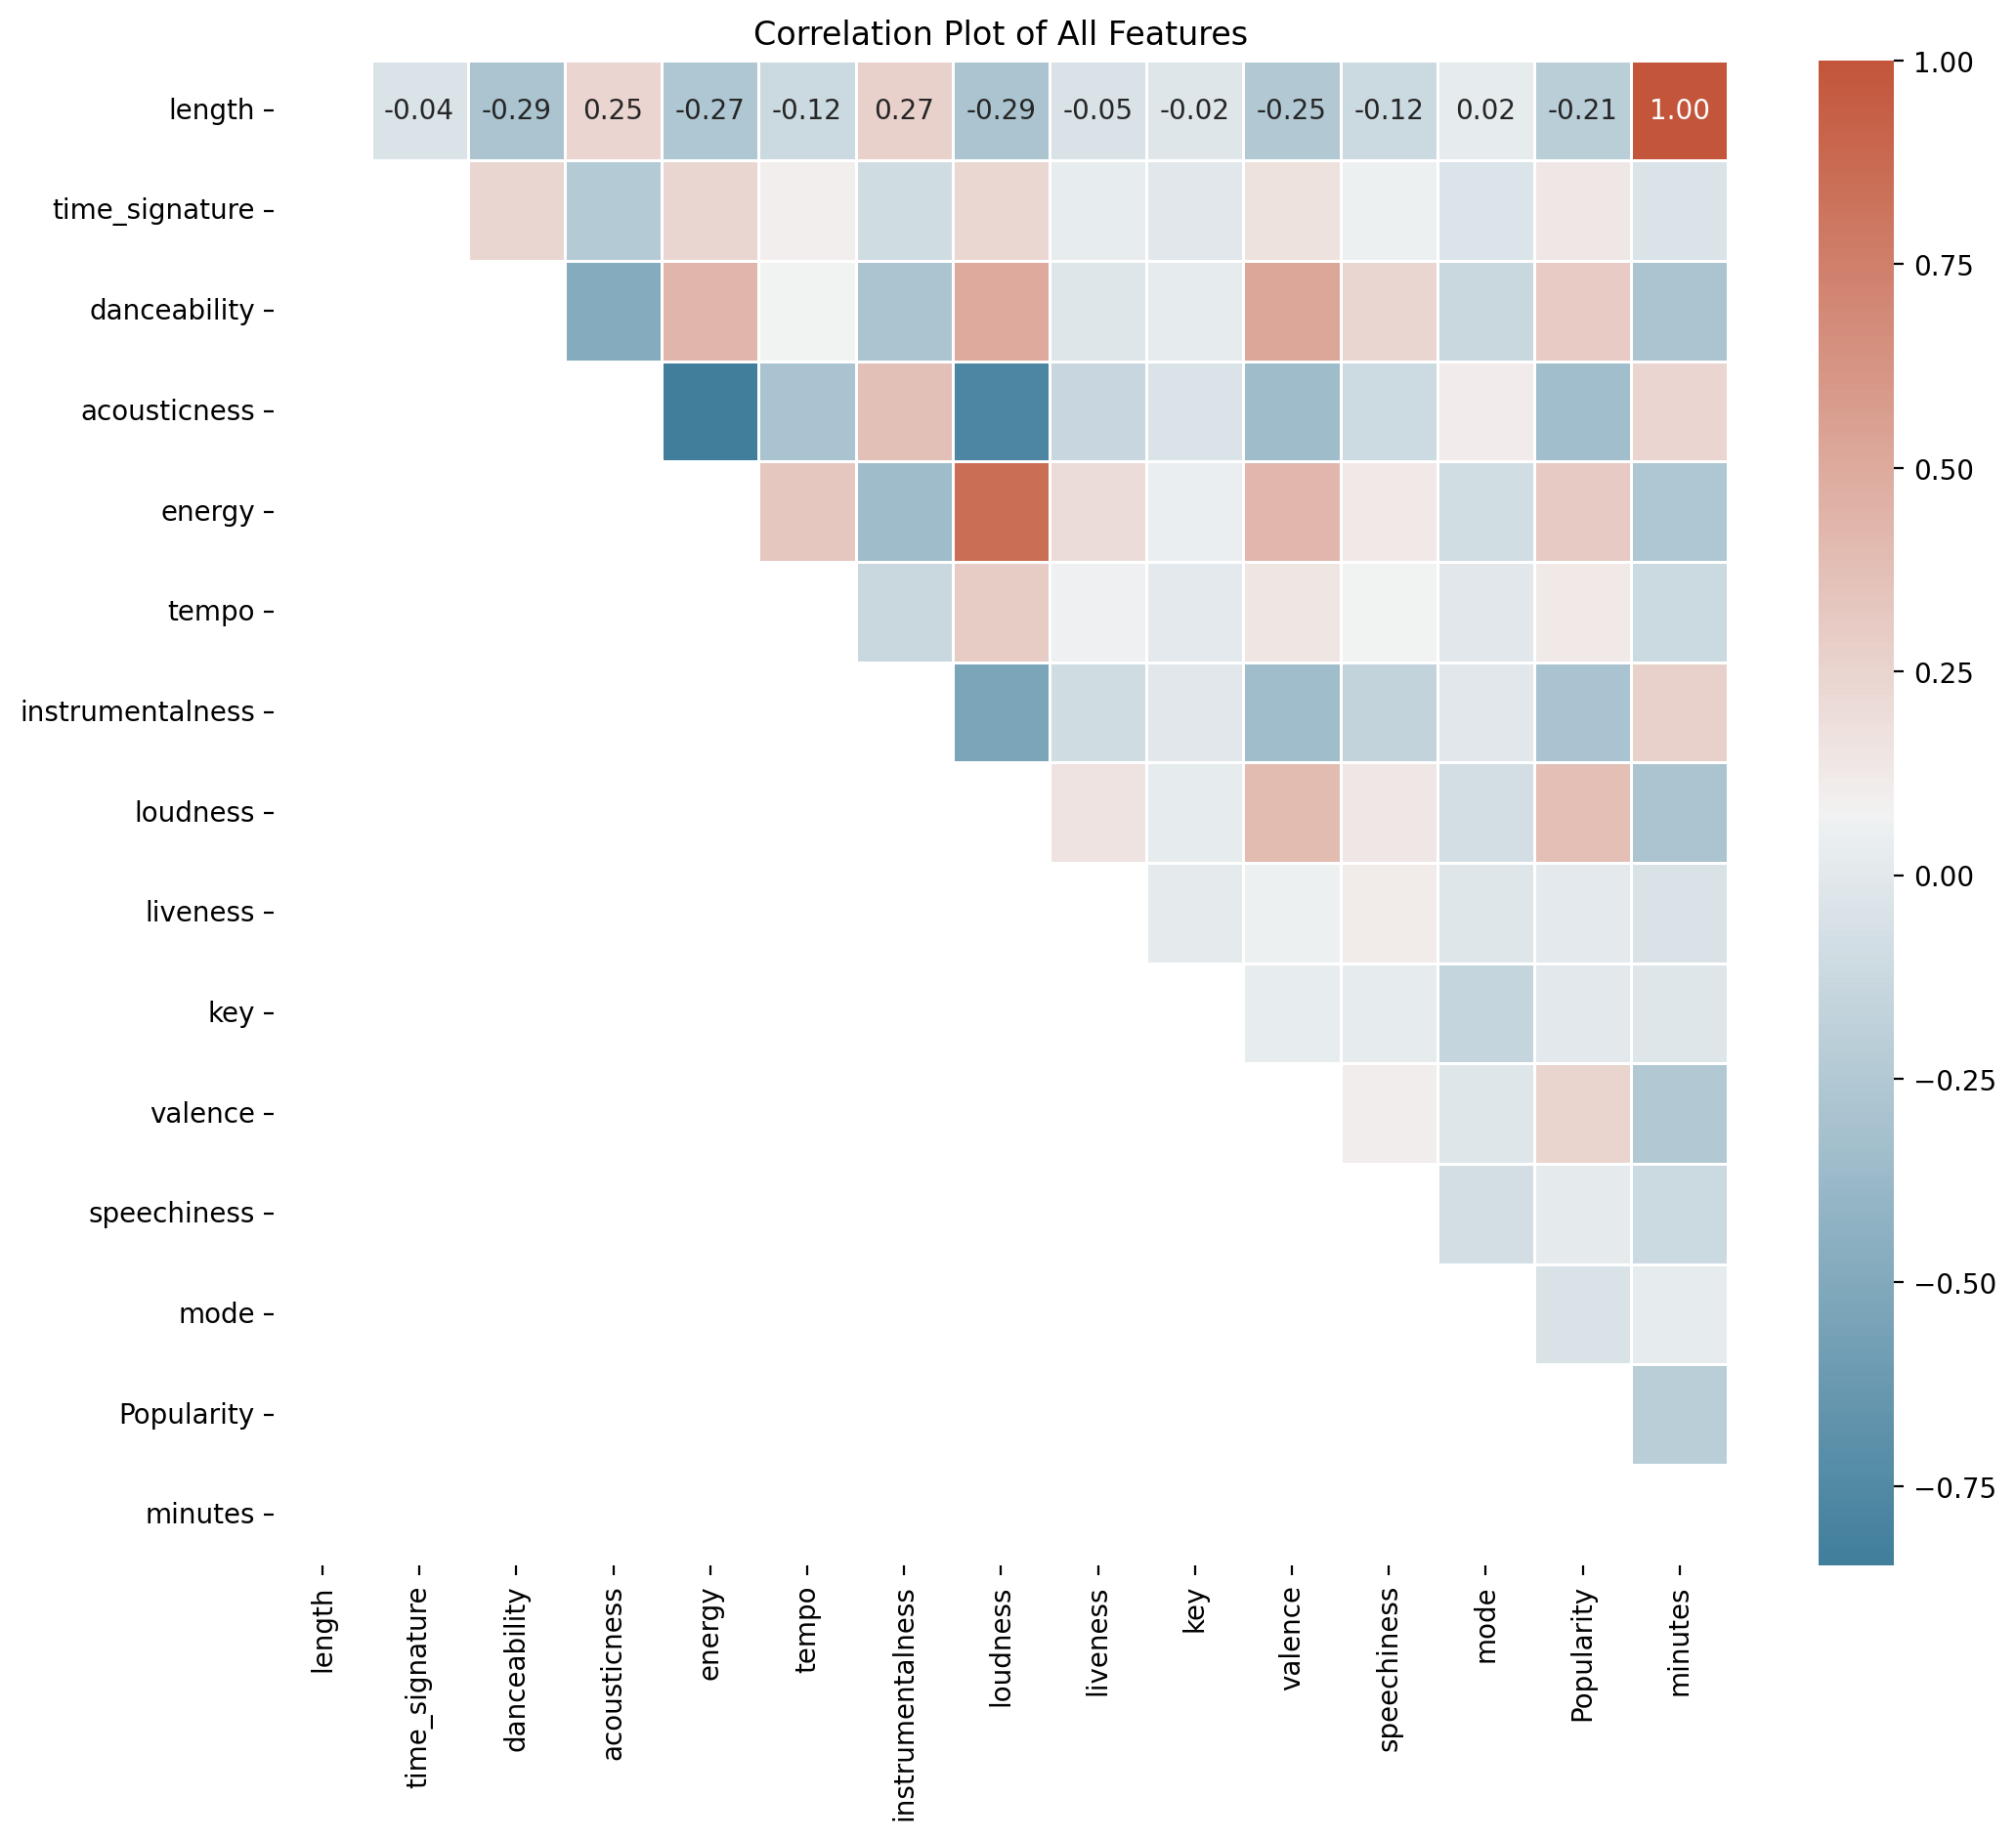

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for all numerical features in your DataFrame
corr = df_fav_num.corr()

# Set up the matplotlib figure and adjust its size
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.tril(np.ones_like(corr, dtype=bool))

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Plot of All Features')
plt.show()



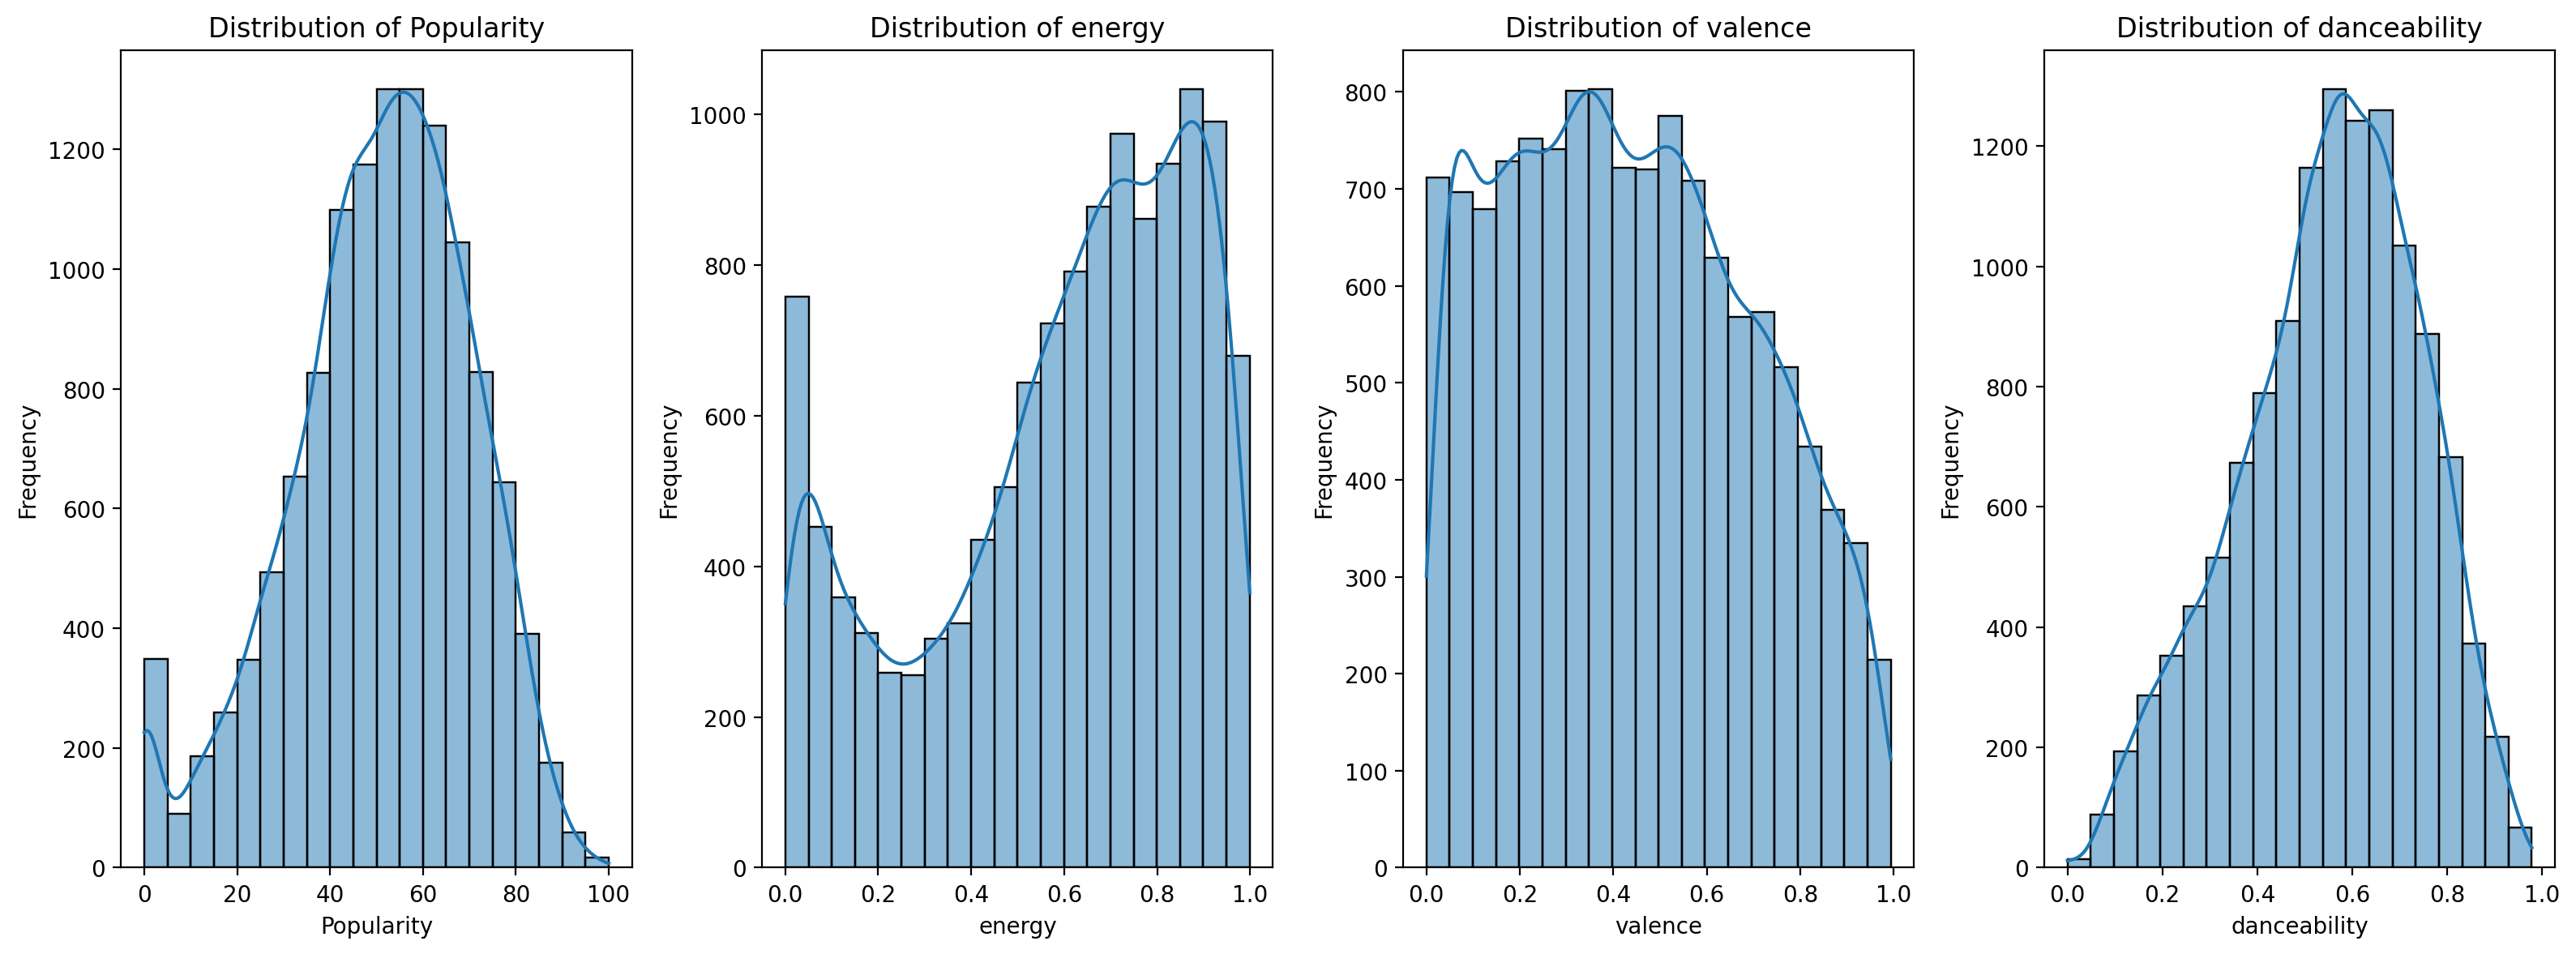

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_num contains multiple columns you want to plot
columns_to_plot = ['Popularity', 'energy', 'valence', 'danceability']  # Replace these with your actual column names

num_columns = len(columns_to_plot)
fig, axes = plt.subplots(1, num_columns, figsize=(16, 6))  # Adjust the figsize as needed

for i, column in enumerate(columns_to_plot):
    sns.histplot(df_num[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()


In [49]:
# Categorical Analysis - for example, artists
artist_counts = df_fav['Artists'].value_counts()
artist_counts

Artists
Drake                                         43
Lil Tecca                                     13
NAV                                            7
Playboi Carti                                  5
Yeat                                           5
Gunna                                          4
Pi’erre Bourne                                 4
Lil Yachty                                     3
Dave                                           3
Lil Uzi Vert                                   3
Destroy Lonely                                 3
Yung Fazo                                      2
Future                                         2
Pop Smoke                                      1
Vegedream                                      1
Ricegum                                        1
Wizkid                                         1
Olivia Rodrigo                                 1
21 Savage                                      1
El-Funoun Palestinian Popular Dance Troupe     1
Young Nudy  

In [50]:
# Categorical Analysis - albums
artist_counts = df_fav['Album'].value_counts()
artist_counts

Album
For All The Dogs              14
TEC                           10
Honestly, Nevermind            9
Dark Lane Demo Tapes           4
Certified Lover Boy            3
                              ..
Bad Habits (Deluxe)            1
البخت                          1
AftërLyfe                      1
Who Told You (feat. Drake)     1
What A Time To Be Alive        1
Name: count, Length: 63, dtype: int64

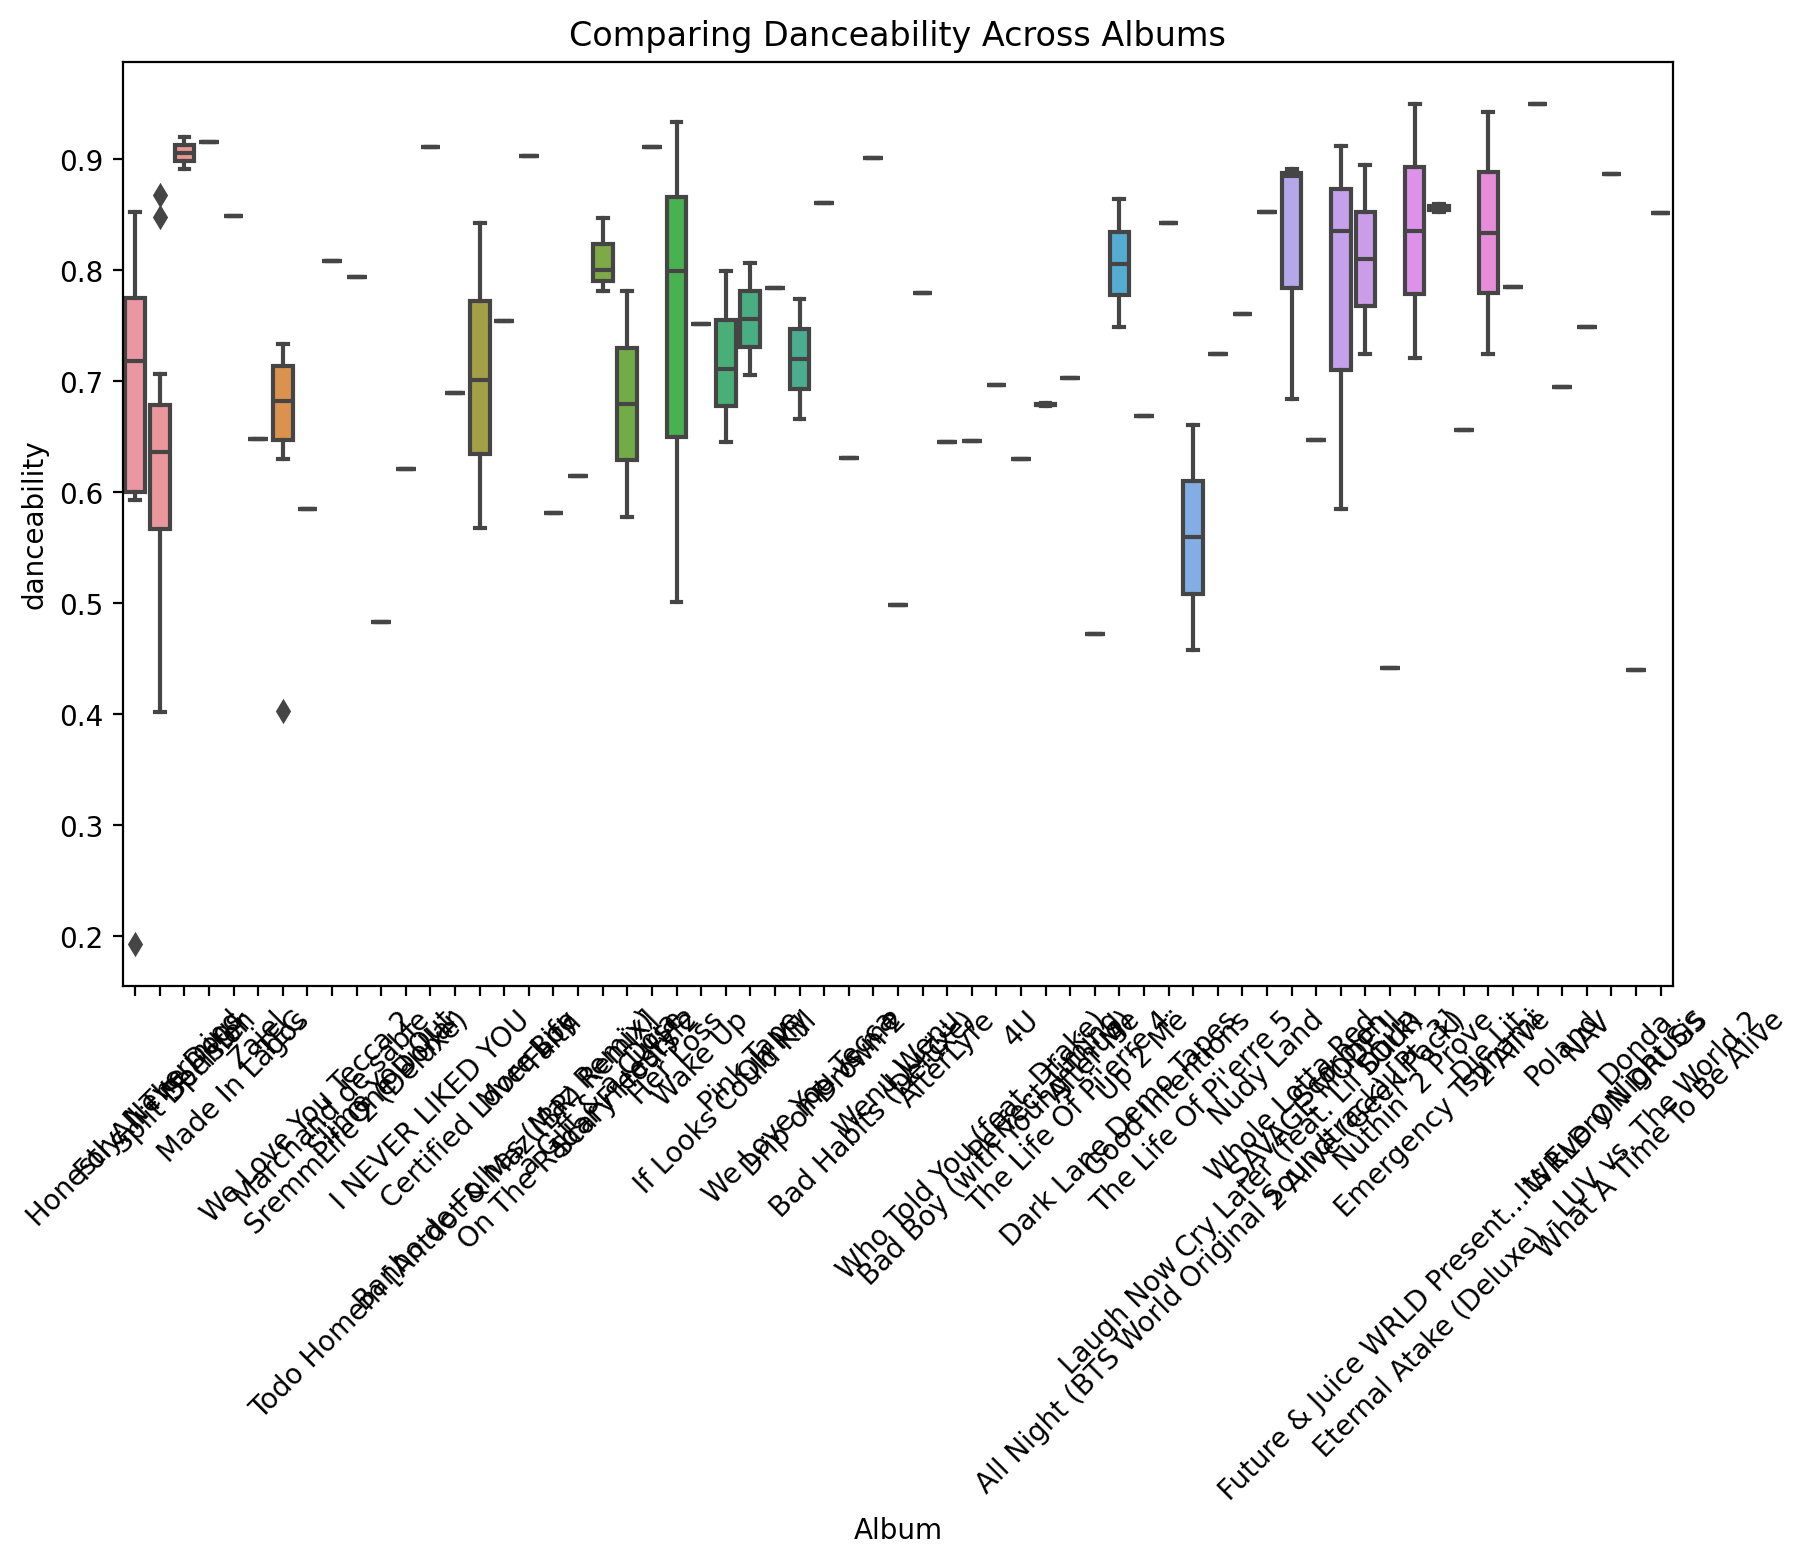

In [43]:
# Comparative Analysis - comparing danceability across albums
plt.figure(figsize=(10, 6))
sns.boxplot(x='Album', y='danceability', data=df_fav)
plt.title('Comparing Danceability Across Albums')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create a pairplot
#sns.pairplot(df_fav_num)
#plt.show()